# Modelos lineales

- Los `modelos lineales` son una clase de modelos que se utilizan ampliamente en la práctica y se han estudiado mucho en las últimas décadas, con raíces que se remontan a más de cien años. Los `modelos lineales` hacen una `predicción utilizando una función lineal de las características de entrada`, que explicaremos en breve.

## Modelo de regresión lineal

**`Formulación`**

El modelo

$$
\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon},
$$ (linear_reg)

se denomina, `modelo de regresión lineal` clásico, si se cumplen los siguientes supuestos:

- $\mathbb{E}(\boldsymbol{\varepsilon})=\boldsymbol{0}$
- $\text{Cov}(\boldsymbol{\varepsilon})=\mathbb{E}(\boldsymbol{\varepsilon}\boldsymbol{\varepsilon}^{T})=\sigma^{2}\boldsymbol{I}$
- La matriz de diseño $\boldsymbol{X}$ tiene `rango completo`, es decir $\textrm{rk}(\boldsymbol{X})=p+1$
- El `modelo de regresión normal` clasico es obtenido si adicionalmente  se tiene que $\boldsymbol{\varepsilon}\sim N(\boldsymbol{0}, \sigma^{2}\boldsymbol{I})$. 
- El `modelo de regresión lineal` {eq}`linear_reg` puede escribirse en la siguiente forma

$$
\begin{pmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{i}\\
\vdots\\
y_{n}
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p}\\
1 & x_{21} & x_{22} & \cdots & x_{2p}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{i1} & x_{i2} & \cdots & x_{ip}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix}
\begin{pmatrix}
\beta_{0}\\[2mm]
\beta_{1}\\[2mm]
\beta_{2}\\
\vdots\\[2mm]
\beta_{p}
\end{pmatrix}
+
\begin{pmatrix}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{i}\\
\vdots\\
\varepsilon_{n}
\end{pmatrix}
$$ (linear_reg_mat)

- A partir del sistema {eq}`linear_reg_mat`, se puede observar que la $i$-esima `predicción para un modelo lineal` es la siguiente:

$$
\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1}\cdot x_{i1}+\hat{\beta}_{2}\cdot x_{i2}+\cdots+\hat{\beta}_{p}\cdot x_{ip}=\boldsymbol{\hat{\beta}}^{T}\boldsymbol{x}_{i},~i = 1,2,\dots, n.
$$

- Aquí, $x_{i1},\dots, x_{ip}$ denotan las `variables predictoras o características` (en este ejemplo, el número de características es $p$). Los valores, $\hat{\beta}_{i},~i=0,1,\dots,p$, son lo `parámetros aprendidos por el modelo` y $\hat{y}_{i}$ es la `predicción obtenida por el modelo`. Por ejemplo, para un conjunto de datos con una sola característica, se tiene que:

$$
\hat{y}_{i} = \hat{\beta}_{0}+\hat{\beta}_{1}\cdot x_{i1},~i=1,2,\dots,n.
$$

- Aquí, $\hat{\beta}_{1}$ es la `pendiente` y $\hat{\beta}_{0}$ es el `desplazamiento en el eje` $y$. Para más características, $\boldsymbol{\hat{\beta}}$ contiene las `pendientes a lo largo de cada eje de características`. Alternativamente, se puede pensar en la `respuesta predicha` como una `suma ponderada de las características de entrada`, con pesos (que pueden ser negativos) dados por las entradas de $\boldsymbol{\hat{\beta}}$.

**`Ilustración`**

- Considere el ejemplo de intentar `aprender los parámetros` $\hat{\beta}_{1}:=w[0]$ y $\hat{\beta}_{0}:=b$ en nuestro `conjunto de datos de ondas unidimensionales (wave)` usando `plot_linear_regression_wave()`. En este caso, la función para la regresión lineal de ondas unidimensionales, usa la librería `LinearRegression()`, para ajustar la recta de regresión, basada en mínimos cuadrados.

In [1]:
import mglearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

w[0]: 0.393906  b: -0.031804


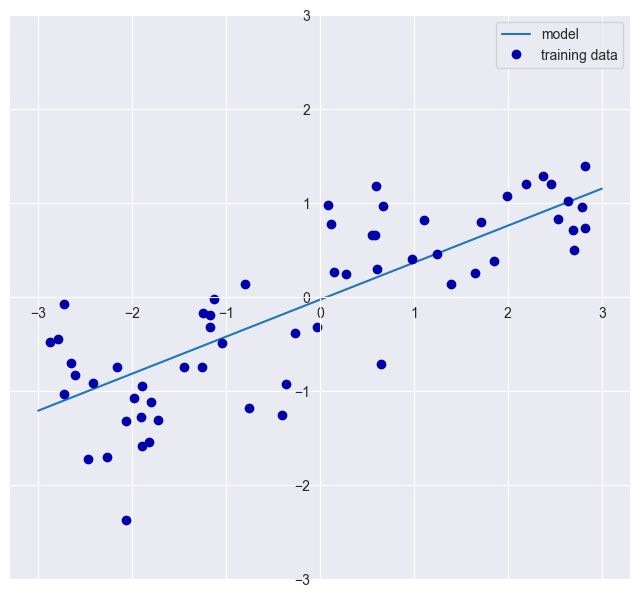

In [2]:
mglearn.plots.plot_linear_regression_wave()

- Si observamos $\hat{\beta}_{1}$, vemos que `la pendiente debería estar en torno a 0.4`, lo que podemos confirmar visualmente en el gráfico. `El intercepto`, punto en el que la línea de predicción debería cruzar el eje $y$, está `ligeramente por debajo de cero`, lo que también se puede confirmar en la imagen.

- Los `modelos de regresión lineal` pueden caracterizarse como `modelos de regresión` en los que `la predicción es una línea para una sola característica, un plano cuando se utilizan dos características, o un hiperplano en dimensiones más altas` (es decir, cuando se utilizan más características).

- Si se comparan las `predicciones realizadas por la línea recta` con las `realizadas por el modelo KNeighborsRegressor`, `usar una línea recta para hacer predicciones parece muy restrictivo. Parece que se pierden todos los detalles finos de los datos`. En cierto sentido, esto es cierto. Es una suposición fuerte (y algo irreal) que nuestro objetivo $y$ es una combinación lineal de las características. Observar los datos de forma unidimensional da una perspectiva algo sesgada.

```{prf:observation}
:label: observation1_ols
- Para los `conjuntos de datos con muchas características, los modelos lineales pueden ser muy potentes`. En particular, si tiene `más características que puntos de datos de entrenamiento, cualquier objetivo` $y$ `puede modelarse perfectamente (en el conjunto de entrenamiento) como una función lineal`. Hay muchos modelos lineales diferentes para la regresión. `La diferencia entre estos modelos radica en cómo se aprenden los parámetros del modelo` $\boldsymbol{\beta}_{1}$ y $\boldsymbol{\beta}_{0}$ a partir de los datos de entrenamiento, y en `cómo se puede controlar la complejidad del modelo`. A continuación veremos los modelos lineales más populares.
```

## Mínimos Cuadrados Ordinarios

- `La regresión lineal, o mínimos cuadrados ordinarios (Ordinary Least Squares (OLS))`, es el modelo lineal `más sencillo y clásico para la regresión`. La regresión lineal `encuentra el vector de parámetros` $\boldsymbol{\hat{\beta}}$ `que minimiza el error cuadrático medio entre las predicciones y los verdaderos objetivos de la regresión`, $y$, `en el conjunto de entrenamiento`. El error medio al cuadrado es la suma de las diferencias al cuadrado entre las predicciones y los valores reales. La regresión lineal no tiene parámetros, lo cual es una ventaja, pero `no tiene forma de controlar la complejidad del modelo`.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

- El número `42` es normalmente elegido en la literatura relacionadas con `AI`, como homenaje al libro de la `Douglas Adams` "[The Hitchhiker's Guide to the Galaxy](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#The_number_42)", una serie de cómic de ciencia ficción creada por `Douglas Adams` que se ha hecho popular entre los aficionados al género y los `miembros de la comunidad científica`. Supuestamente era la respuesta a la gran pregunta `"Life, the universe, and everything"`, calculada por un ordenador (llamado `"Deep Thought"`) creado específicamente para resolverla `:)`. Sin embargo, `random_state` puede ser cualquier número entero, mas aún, podemos realizar un `grid search` para conseguir aquel parámetro `random_state` que no entrega el mejor score. Mas adelante abordaremos el uso de `GirdSearch`. Si no establece `random_state` en `42` o cualquier otro entero positivo, cada vez que ejecute su código de nuevo, generará un conjunto de pruebas diferente.

- Los `parámetros de "pendiente"` ($\hat{\beta}_{i},~i=1,2,\dots,p$), también llamados `pesos o coeficientes, se almacenan en el atributo coef_`, mientras que el `desplazamiento o intercepto` ($\hat{\beta}_{0}$) se almacena en el atributo `intercept_`:

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


```{prf:observation}
:label: observation_lm1

El extraño `guion bajo` al final de `coef_` e `intercept`_ es usado a menudo por `scikit-learn` para almacenar cualquier `objeto que se deriva de los datos de entrenamiento`, usando atributos que terminan con un guion bajo al final. Esto es `para separarlos de los parámetros que son establecidos por el usuario`.
```

- El atributo `intercept_` es siempre un `único número flotante`, mientras que el atributo `coef_ es una matriz NumPy con una entrada por característica`. Como sólo tenemos una característica de entrada en el conjunto de datos `wave`, `lr.coef_` sólo tiene una entrada. Veamos el rendimiento del conjunto de entrenamiento y del conjunto de prueba

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


```{admonition} ¿Cual sería un buen score?
:class: tip, dropdown

Definir un `buen score` en machine learning es un tema subjetivo, y bastante ligado a los datos. Pero, `de forma coherente con los estándares de la industria, cualquier score superior al 70% es un gran rendimiento del modelo`. De hecho, `una medida de precisión de entre el 70% y el 90% no sólo es ideal, sino que es realista`.
```

- `Un` $R^2$ `en torno a 0.66 no es muy bueno`, pero podemos ver que los `score en los conjuntos de entrenamiento y de prueba están muy cerca`. Esto significa que probablemente estemos `subajustando (underfitting)`, no `sobreajustando (overfitting)` nuestro modelo de regresión lineal. Para este conjunto de datos unidimensional, hay poco peligro de overfitting, ya que el modelo es muy simple (o restringido). `En este tipo de casos, optamos por complejizar el modelo para obtener un modelo menos simple`. Sin embargo, `con conjuntos de datos de mayor dimensión (i.e dataset con un gran número de características), los modelos lineales son más potentes, y hay más posibilidades de que se ajusten en exceso`.

## Aplicación: Regresión Ridge y OLS

- Veamos cómo se comporta `LinearRegression` en un conjunto de datos más complejo, como el conjunto de datos de `viviendas de Boston`. Recordemos que este conjunto de datos tiene `506 muestras y 105 características` derivadas. En primer lugar, `cargamos el conjunto de datos` y lo `dividimos en un conjunto de entrenamiento y otro de prueba`. A continuación, construimos el modelo de regresión lineal como antes. Iniciemos realizando un `análisis exploratorio de datos`.

```{figure} ./imgs/boston_houses_ds.jpeg
:name: boston_houses_ds_numref
:align: center
:scale: 70
```

### Análisis Exploratorio de Datos

**`1. Importar librerías PythonImportar librerías Python`**

- Se importan las `librerías esenciales` para facilitar el análisis que abarca la `carga de datos, la evaluación estadística, la visualización, la transformación de datos, la fusión y la unión`

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**`2. Lectura de datos`**

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/main/boston.csv', index_col=0)

- **`Análisis de Datos`**: El objetivo principal de la `comprensión de datos` es obtener información general sobre los datos, que abarca el `número de filas y columnas, valores y tipos de datos así como también datos faltantes.`

In [9]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


- `Información de atributos (por orden)`:

    - `CRIM`: tasa de criminalidad per cápita por ciudad
    - `ZN`: proporción de suelo residencial para parcelas de más de 25.000 pies cuadrados
    - `INDUS`: proporción de acres comerciales no minoristas por ciudad
    - `CHAS`: Variable dummy del Río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)
    - `NOX`: concentración de óxidos nítricos (partes por 10 millones)
    - `RM`: número medio de habitaciones por vivienda
    - `AGE`: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    - `DIS`: distancias ponderadas a cinco centros de empleo de Boston
    - `RAD`: índice de accesibilidad a autopistas radiales
    - `TAX`: tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
    - `PTRATIO`: relación alumnos-profesor por ciudad
    - `B`: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    - `LSTAT`: % más bajo de la población
    - `MEDV`: Valor medio de las viviendas ocupadas por sus propietarios en $1000's.

- **`Comprobación de duplicados`**

In [12]:
data.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

- **`Conteo de datos faltantes y porcentaje`**

In [13]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [14]:
(data.isnull().sum()/(len(data)))*100

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

- Operaciones relacionadas con `Feature Engineering, Reducción y Gestión` pueden llevarse a cabo de ser necesarias.

**`3. EDA Análisis exploratorio de datos`**

- El `análisis exploratorio de datos` se refiere al proceso crucial de realizar investigaciones iniciales sobre los datos para `descubrir patrones y comprobar supuestos` con la ayuda de `estadísticas resumidas y representaciones gráficas`.

    - El `EDA` puede utilizarse para buscar `valores atípicos, patrones y tendencias en los datos`.
    - `EDA` ayuda a encontrar `patrones significativos en los datos`.
    - `EDA` proporciona una `visión en profundidad de los conjuntos de datos` para resolver nuestros problemas de negocio.
    - `EDA` proporciona una pista para `imputar los valores que faltan en el conjunto de datos`.

- **`Resumen estadístico`**

In [15]:
data['chas'] = data['chas'].astype(object)

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


In [17]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['chas'], dtype='object')
Numerical Variables:
['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


- **`Análisis univariado`** 

In [18]:
from scipy.stats import kurtosis

- **`Asimetría`**

    - `skew = 0`: Distribución `simétrica` (valores aceptables `skew`$\in(-1, 1)$).
    - `skew > 0`: Mayor peso en la cola izquierda de la distribución (`sesgo positivo`).
    - `skew < 0`: Mayor peso en la cola derecha de la distribución (`sesgo negativo`).

- **`Kurtosis`**: Determina si una distribución tiene `colas gruesas con respecto a la distribución normal`. Proporciona información sobre la `forma de una distribución de frecuencias`.

    - `kurtosis=3`: se denomina `mesocúrtica` (distribución normal).
    - `kurtosis<3`: se denomina `platicúrtica (distribución con colas menos gruesas que la normal)`.
    - `kurtosis>3`: se denomina `leptocúrtica (distribución con colas más gruesas que la normal)` y significa que trata de `producir más valores atípicos que la distribución normal`.

- **`Variables numéricas`**

Column:  crim
Skew: 5.22
Kurtosis:  37.13


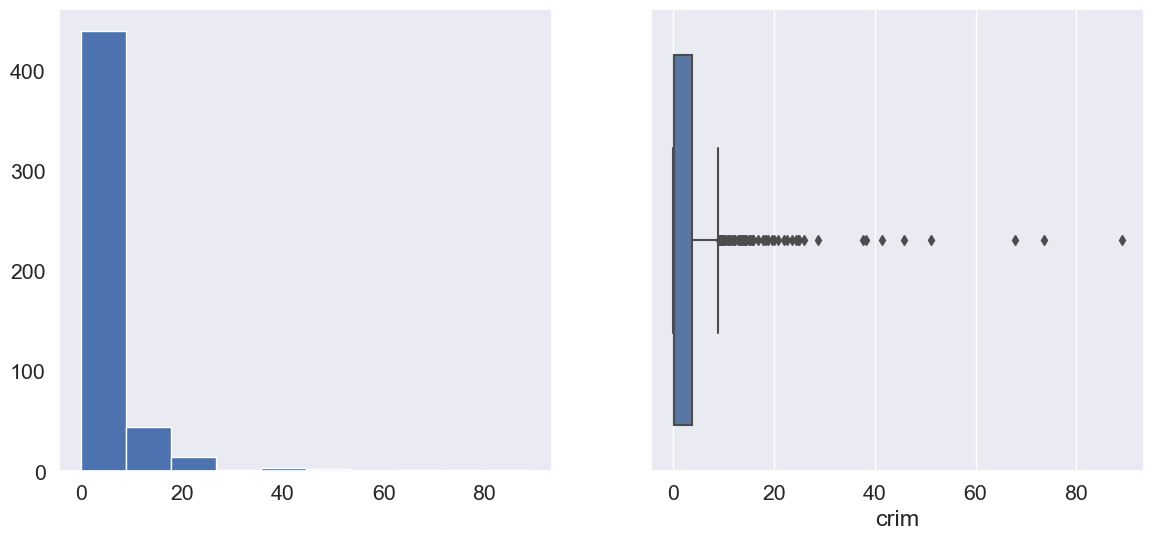

Column:  zn
Skew: 2.23
Kurtosis:  4.03


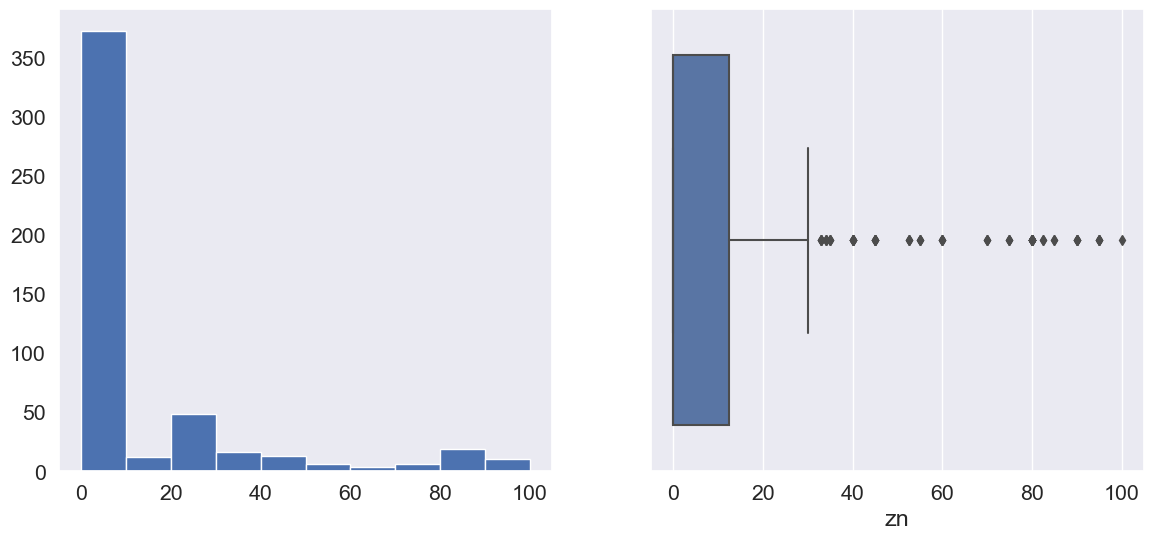

Column:  indus
Skew: 0.3
Kurtosis:  -1.23


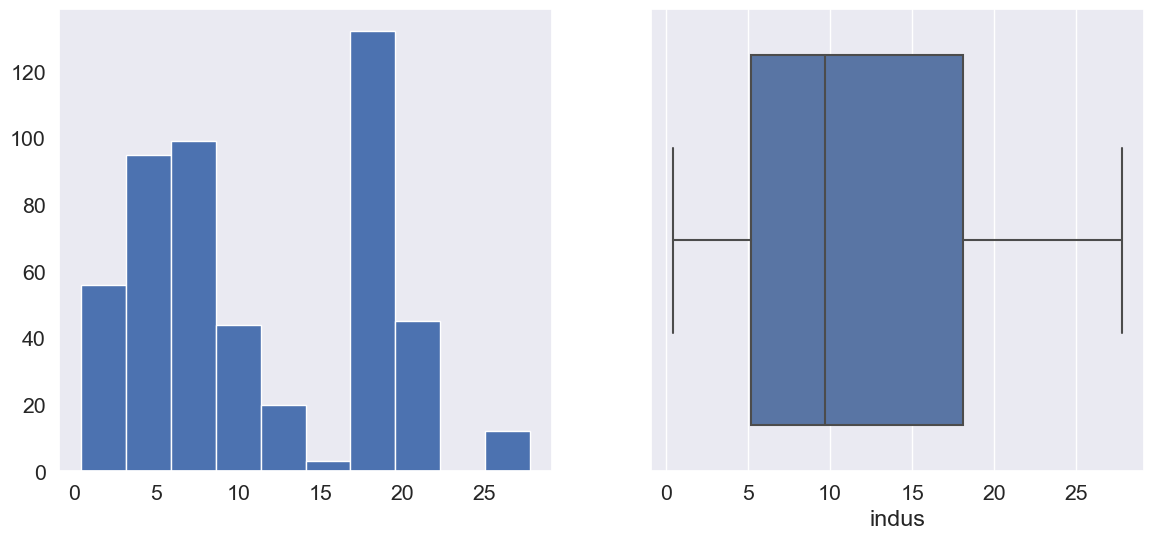

Column:  nox
Skew: 0.73
Kurtosis:  -0.06


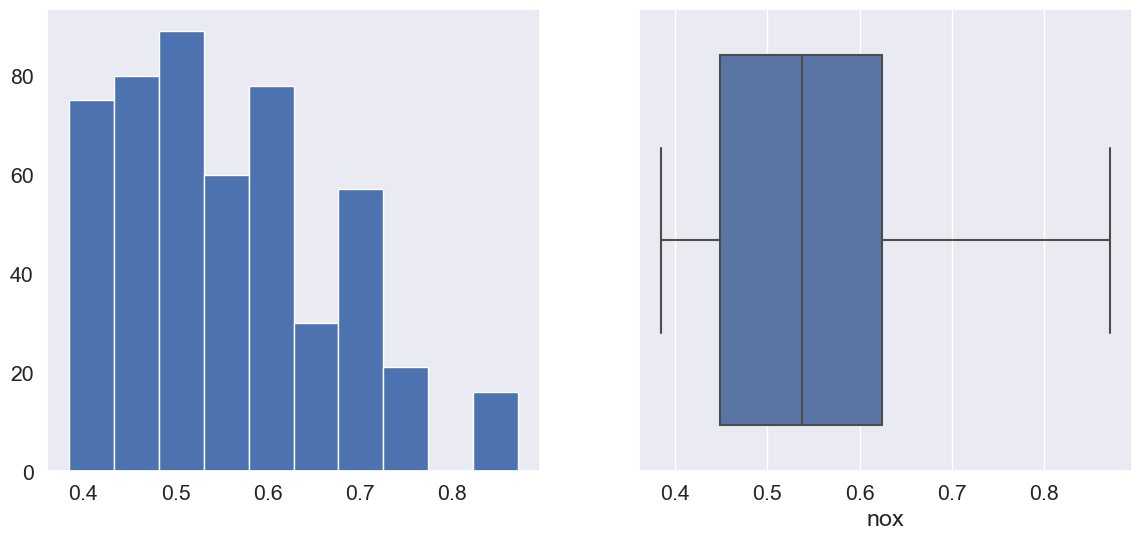

Column:  rm
Skew: 0.4
Kurtosis:  1.89


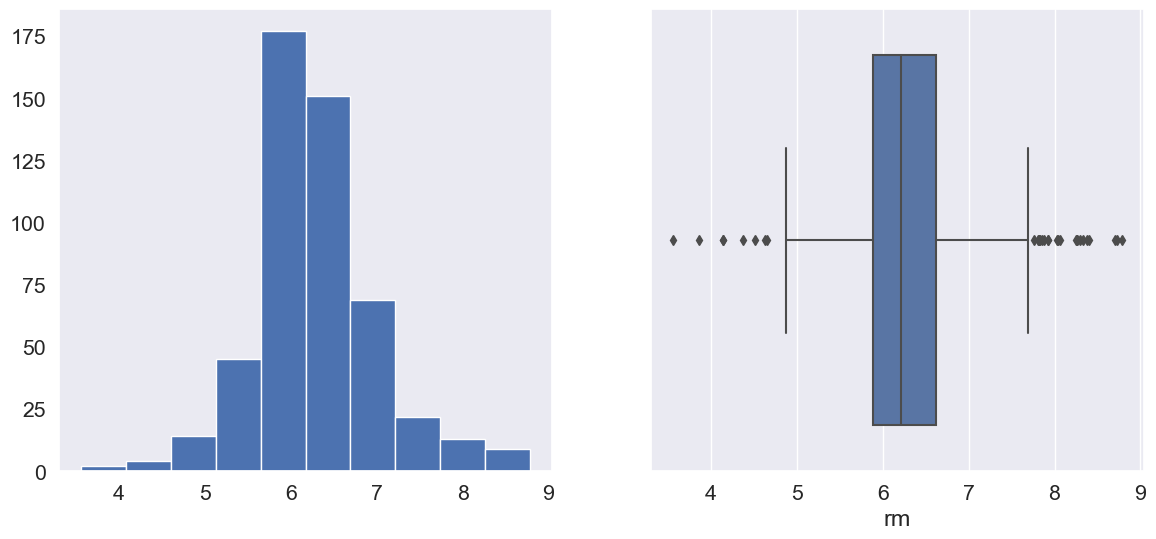

Column:  age
Skew: -0.6
Kurtosis:  -0.97


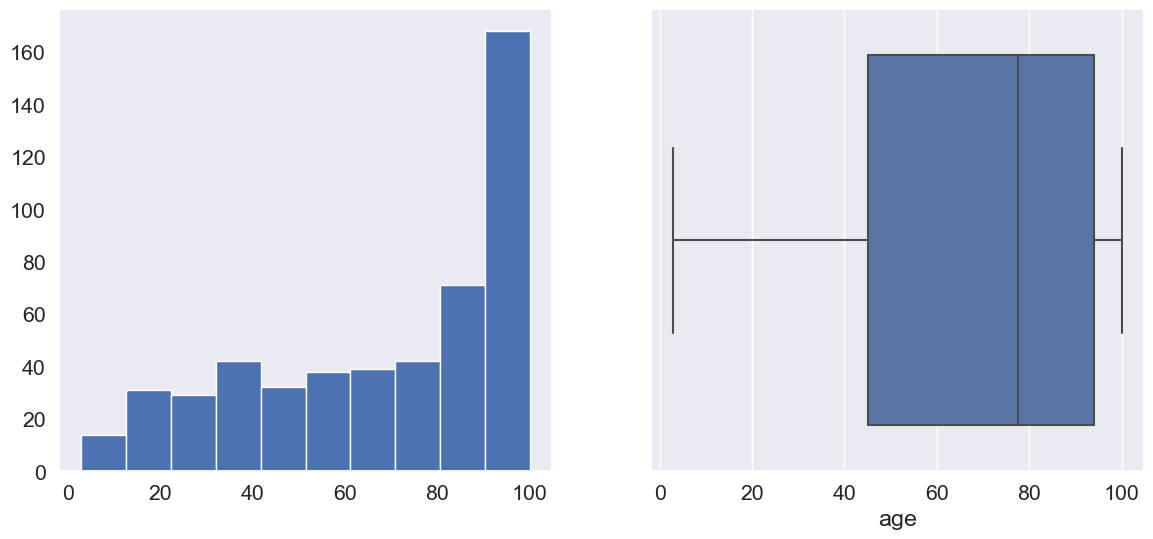

Column:  dis
Skew: 1.01
Kurtosis:  0.49


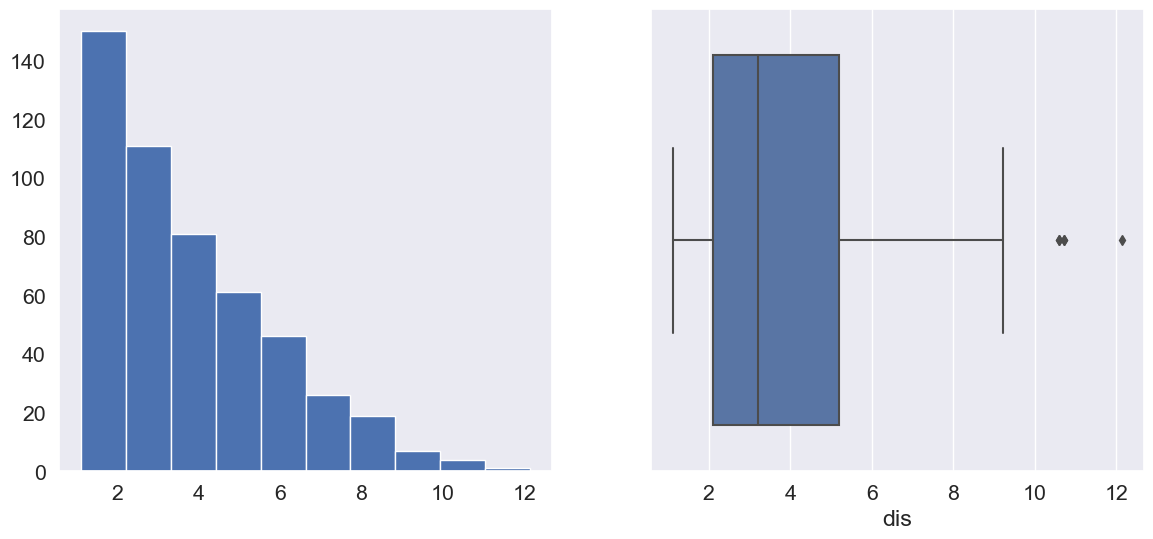

Column:  rad
Skew: 1.0
Kurtosis:  -0.87


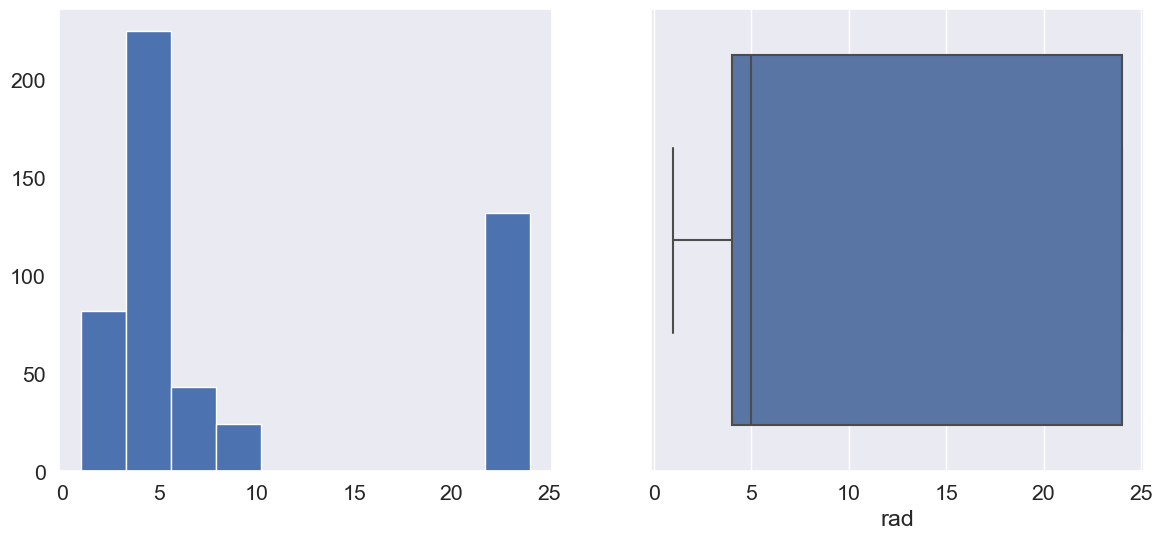

Column:  tax
Skew: 0.67
Kurtosis:  -1.14


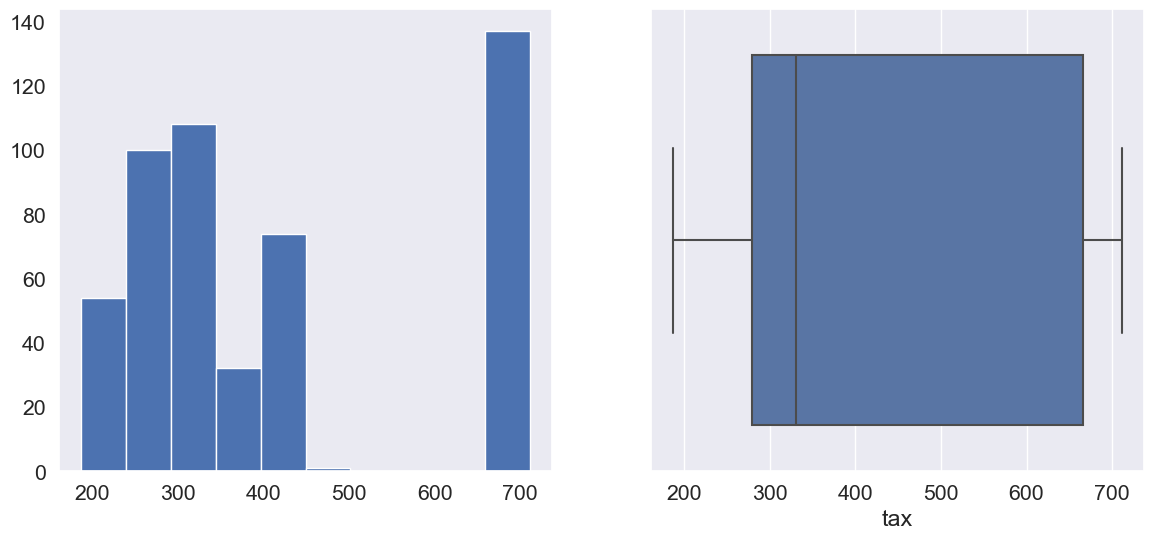

Column:  ptratio
Skew: -0.8
Kurtosis:  -0.29


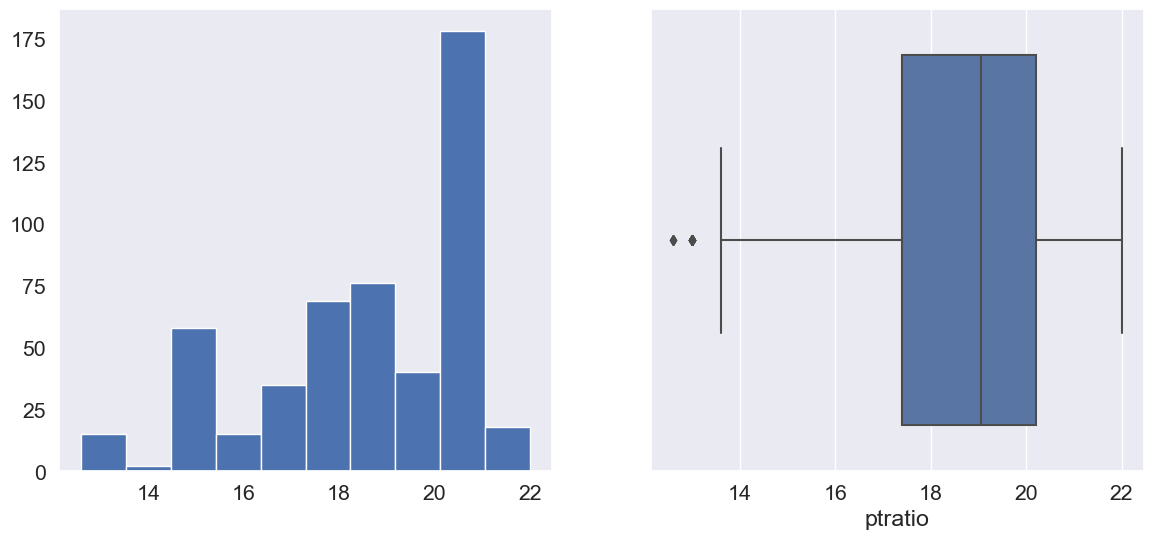

Column:  black
Skew: -2.89
Kurtosis:  7.23


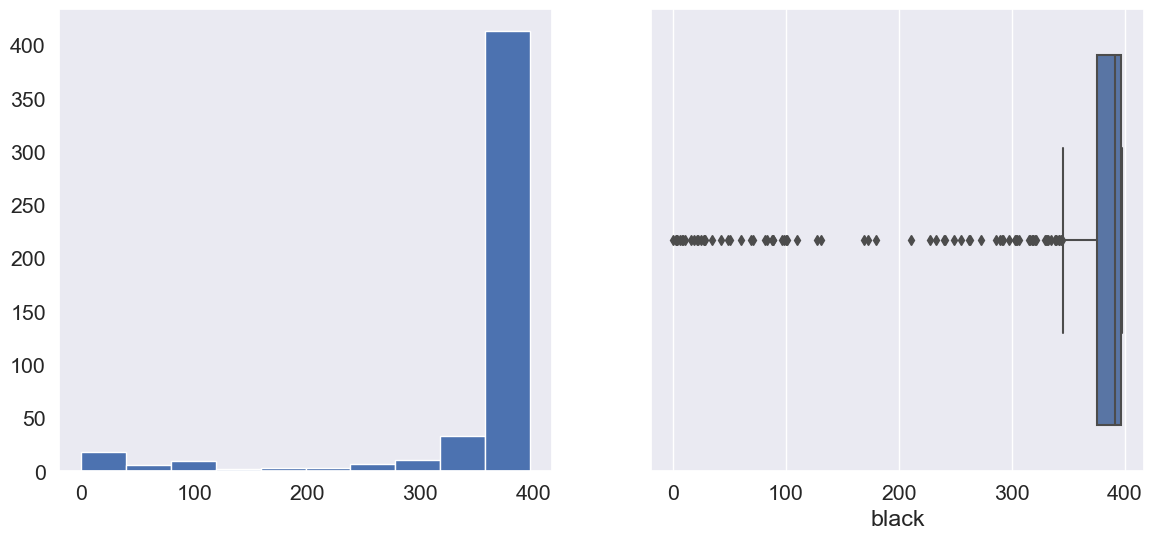

Column:  lstat
Skew: 0.91
Kurtosis:  0.49


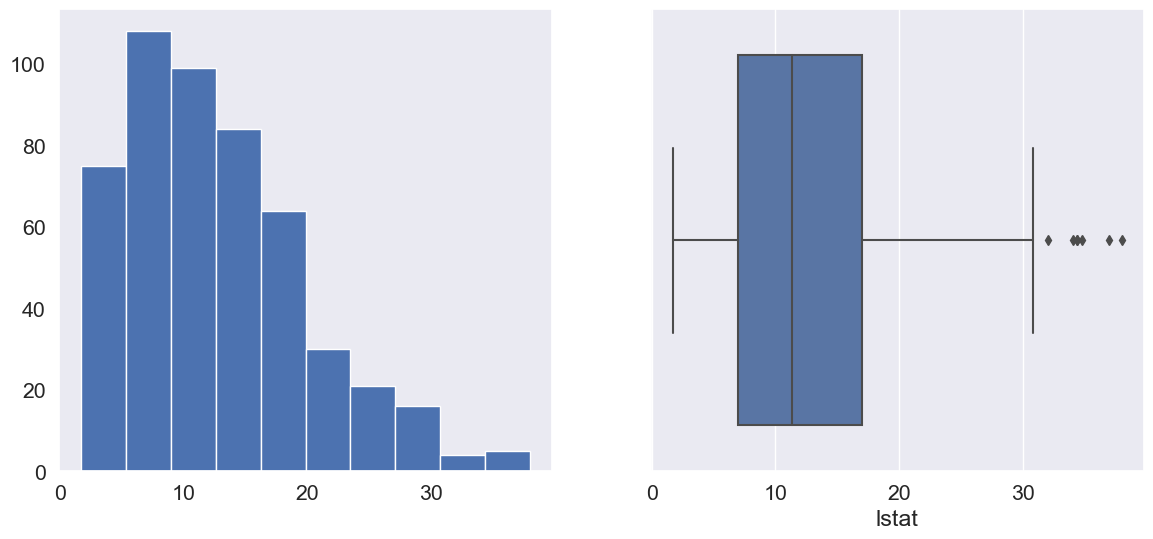

Column:  medv
Skew: 1.11
Kurtosis:  1.5


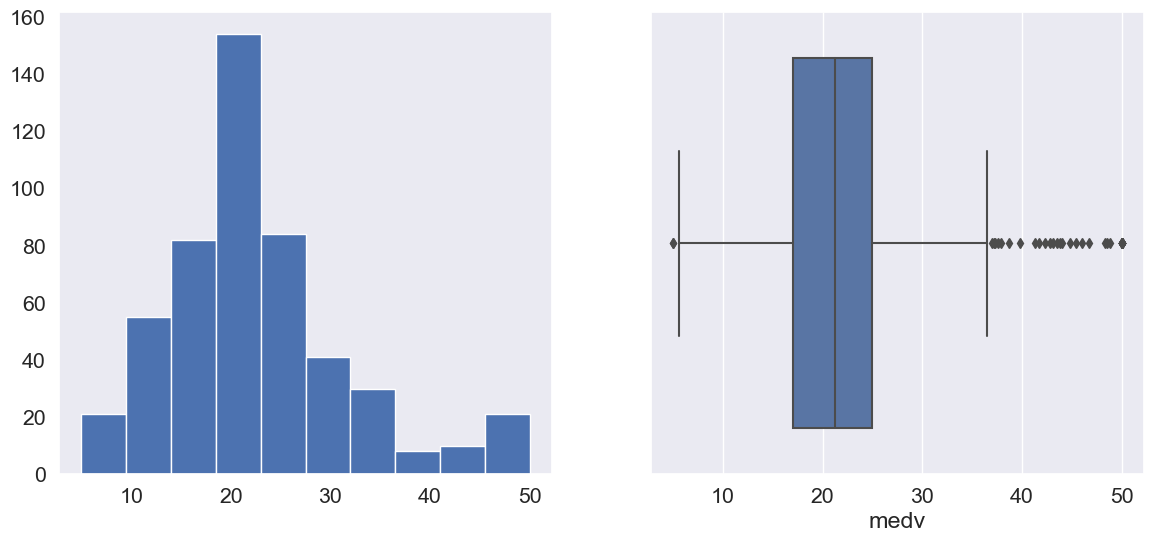

In [19]:
sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(data[col].skew(), 2))
    print('Kurtosis: ', round(data[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

- **`Variables categóricas`**: Usando `diagramas de barras` representamos la variable dummy del `Río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)`

In [20]:
matplotlib.rc_file_defaults()

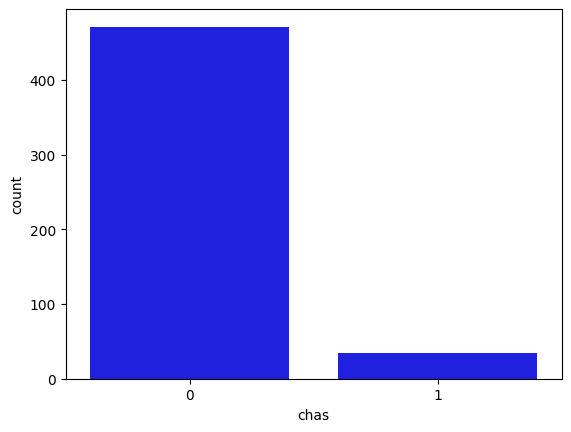

In [21]:
sns.countplot(x = 'chas', data = data, color = 'blue', order = data['chas'].value_counts().index);

- **`Transformación de datos:`** Las variables por ejemplo `crime` y `black`, por ejemplo, están muy sesgadas y en una escala mayor. Hagamos una `transformación logarítmica`. La transformación logarítmica `puede ayudar en la normalización`, por lo que esta variable puede `mantener la escala estándar con otras variables`

In [22]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [23]:
log_transform(data,['crim','black'])

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crim       506 non-null    float64
 1   zn         506 non-null    float64
 2   indus      506 non-null    float64
 3   chas       506 non-null    object 
 4   nox        506 non-null    float64
 5   rm         506 non-null    float64
 6   age        506 non-null    float64
 7   dis        506 non-null    float64
 8   rad        506 non-null    int64  
 9   tax        506 non-null    int64  
 10  ptratio    506 non-null    float64
 11  black      506 non-null    float64
 12  lstat      506 non-null    float64
 13  medv       506 non-null    float64
 14  crim_log   506 non-null    float64
 15  black_log  506 non-null    float64
dtypes: float64(13), int64(2), object(1)
memory usage: 67.2+ KB


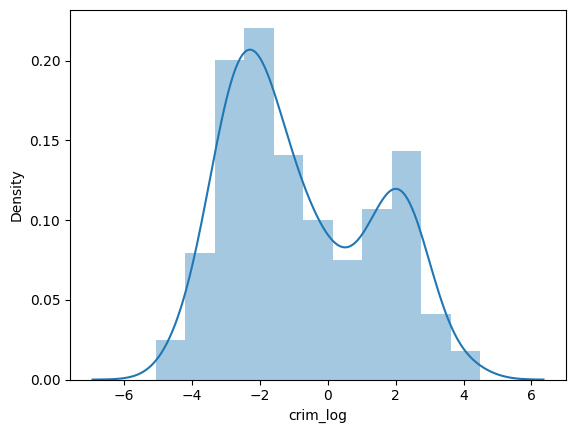

In [24]:
sns.distplot(data["crim_log"], axlabel="crim_log");

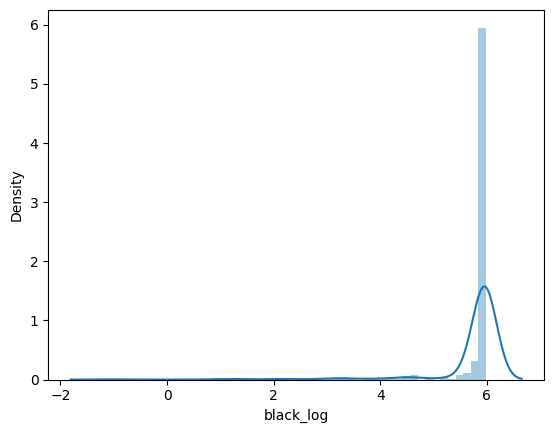

In [25]:
sns.distplot(data["black_log"], axlabel="black_log");

- **`Análisis bivariado`**: Pasemos ahora al análisis bivariado. El `análisis bivariado ayuda a comprender cómo se relacionan las variables entre sí` y la `relación entre las variables dependientes e independientes` presentes en el conjunto de datos. Puede utilizar el siguiente comando para `visualizar todos los scatter plots, para las posibles relaciones`:

```python
sns.pairplot(data=data.drop(['chas', 'black_log', 'crim_log'],axis=1));
```

In [26]:
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1]);
    fig.suptitle('Relación entre %s y medv'%col)

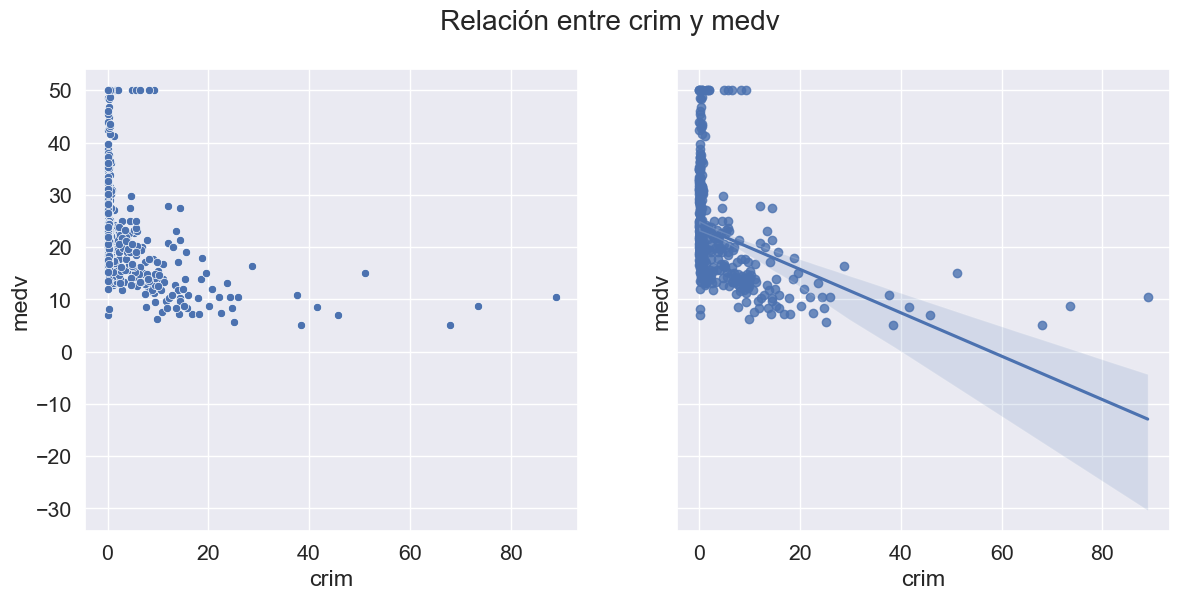

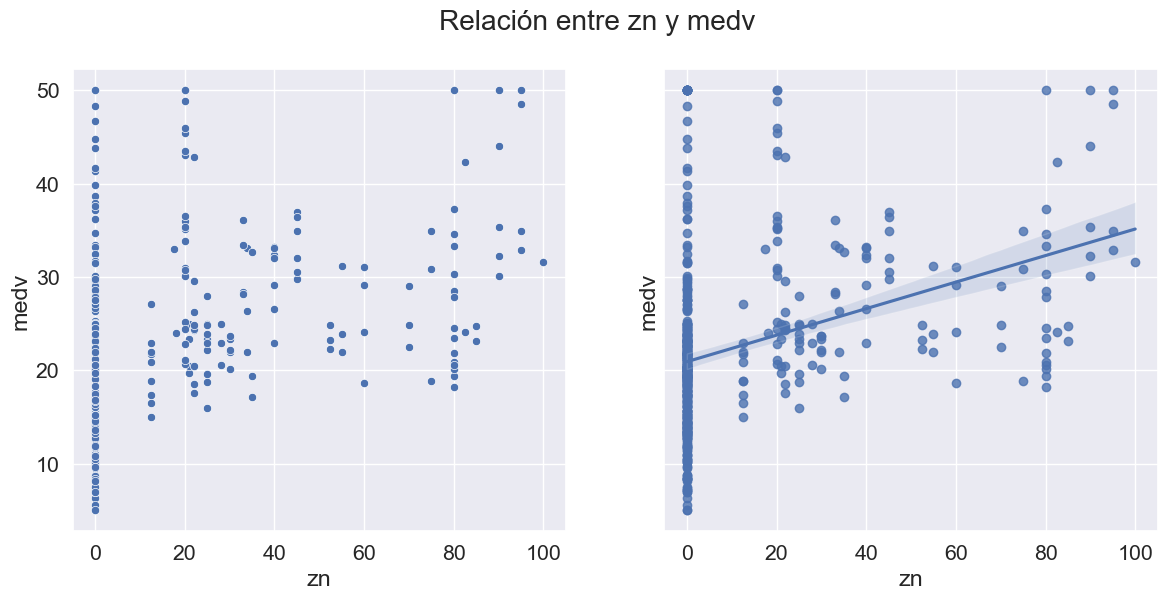

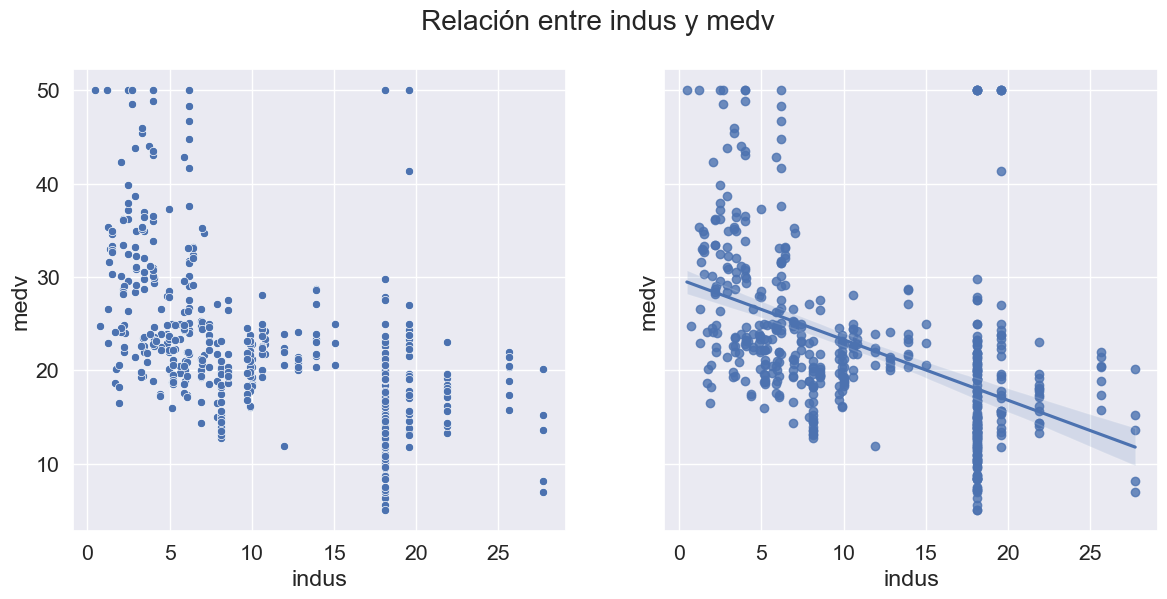

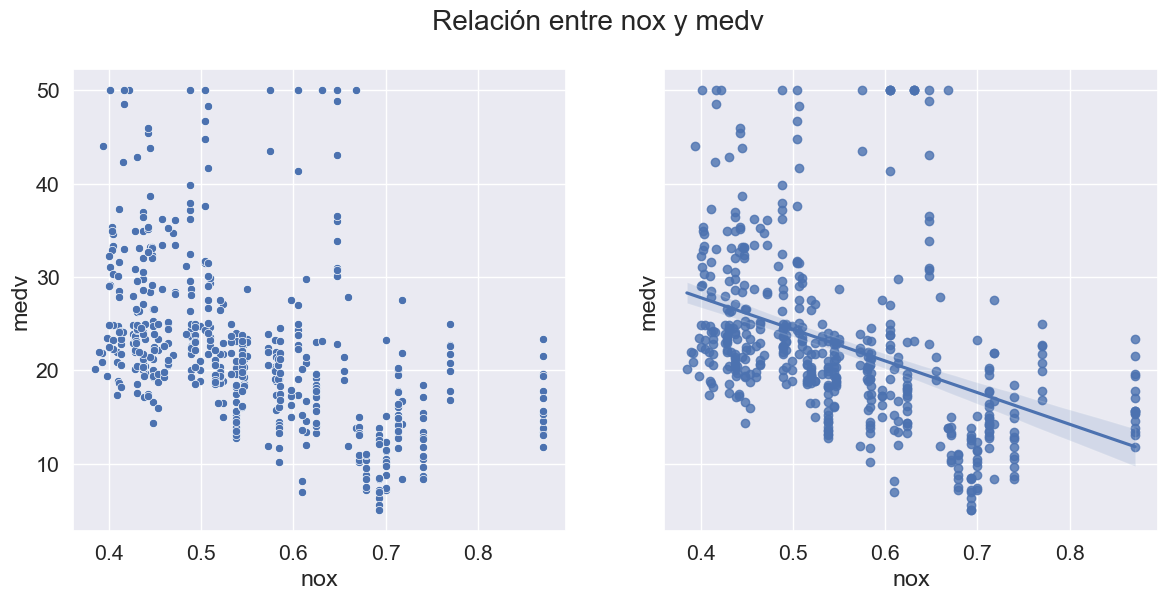

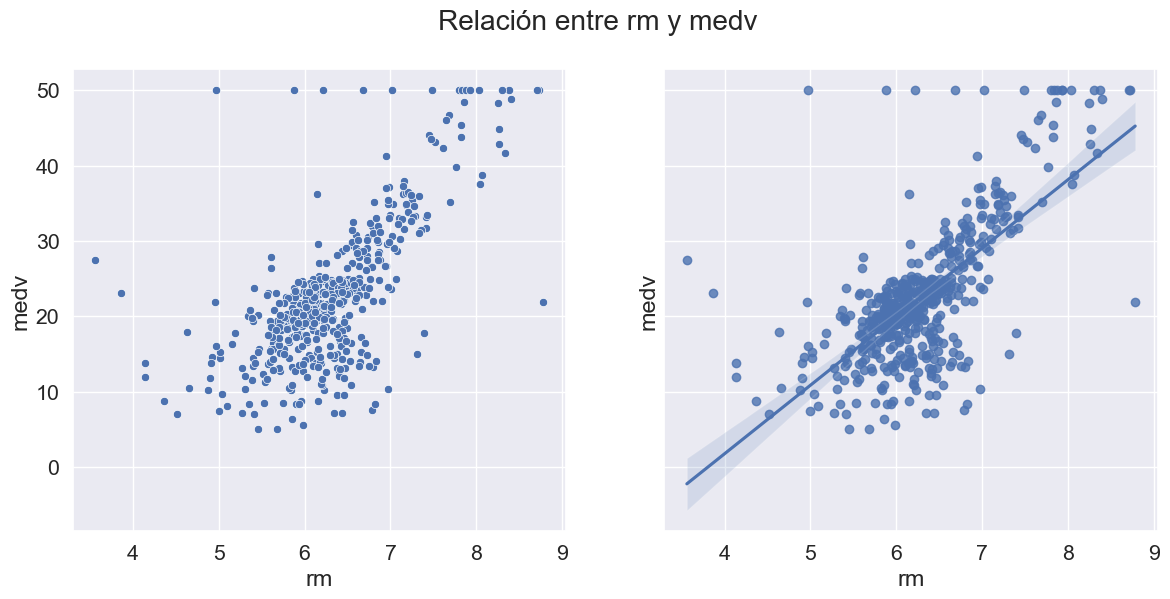

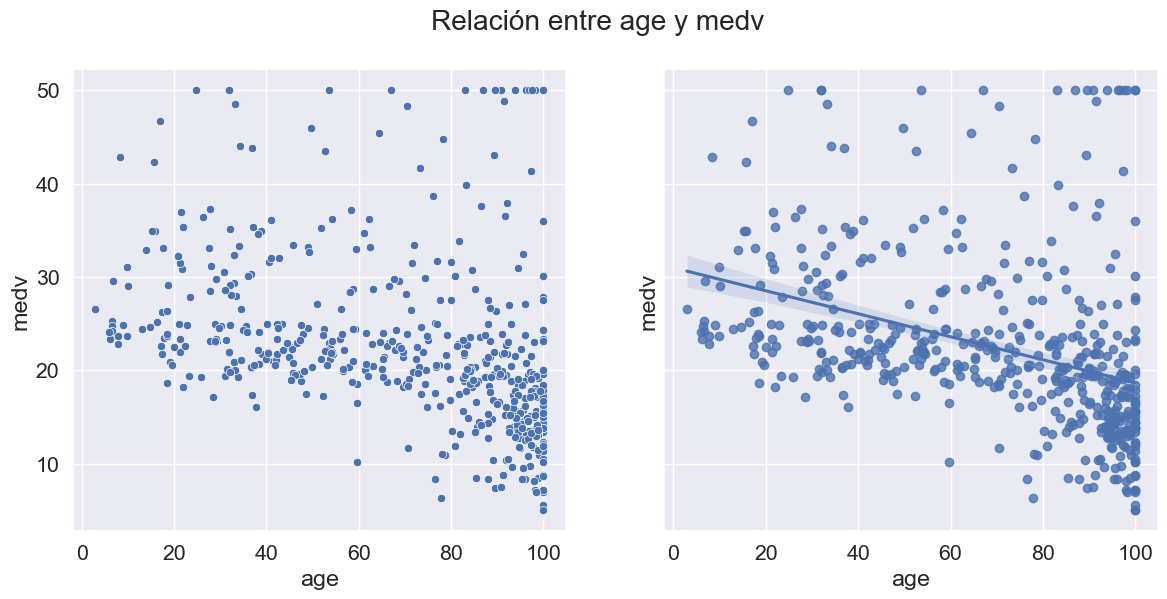

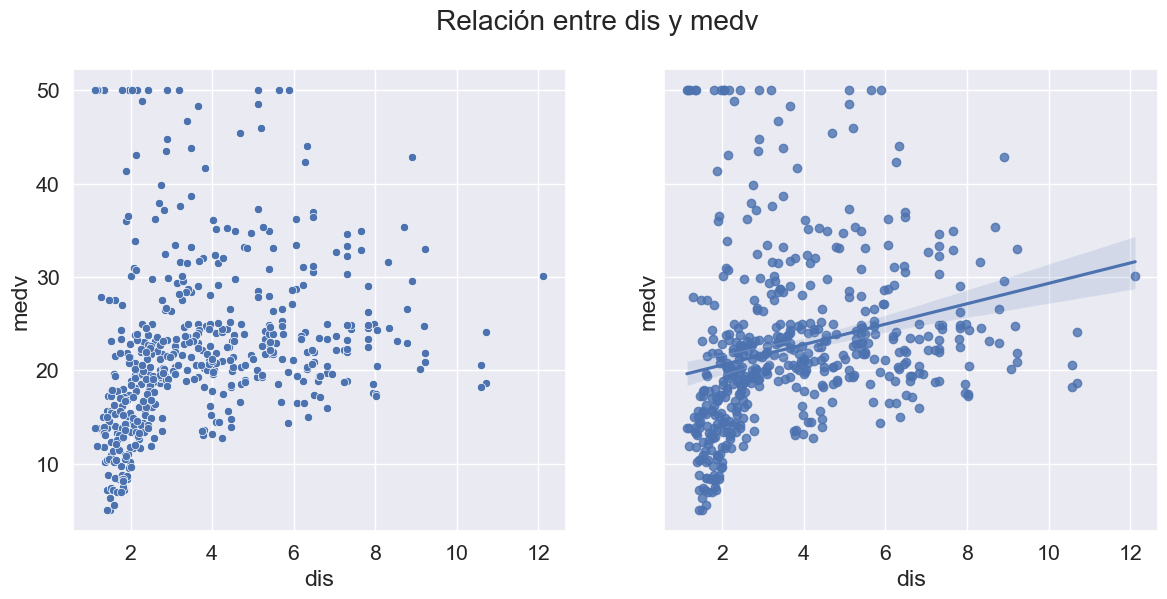

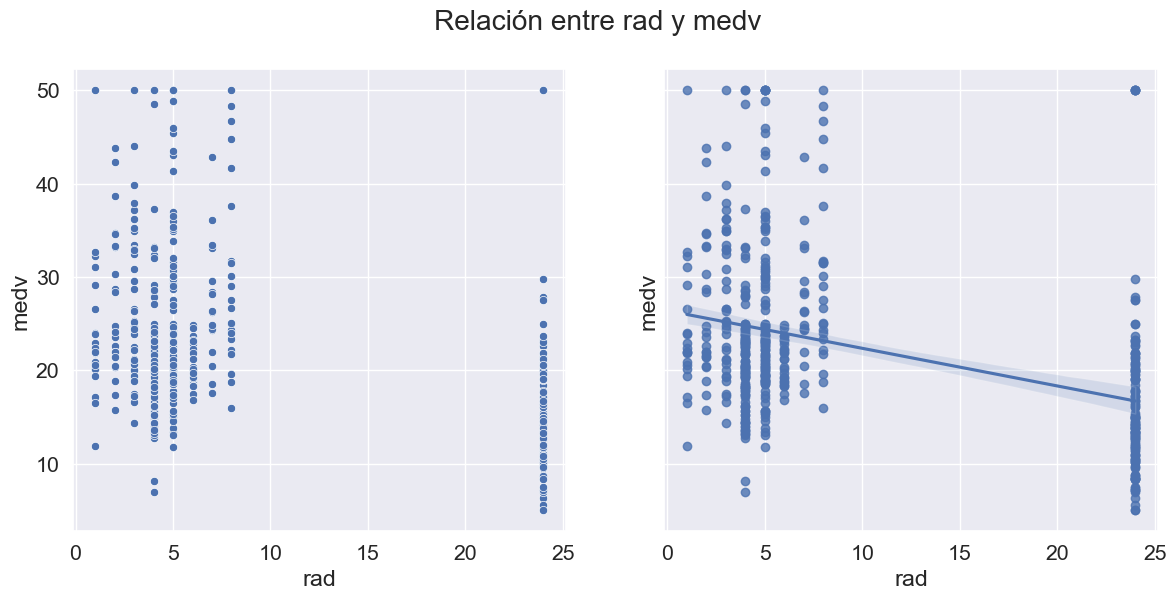

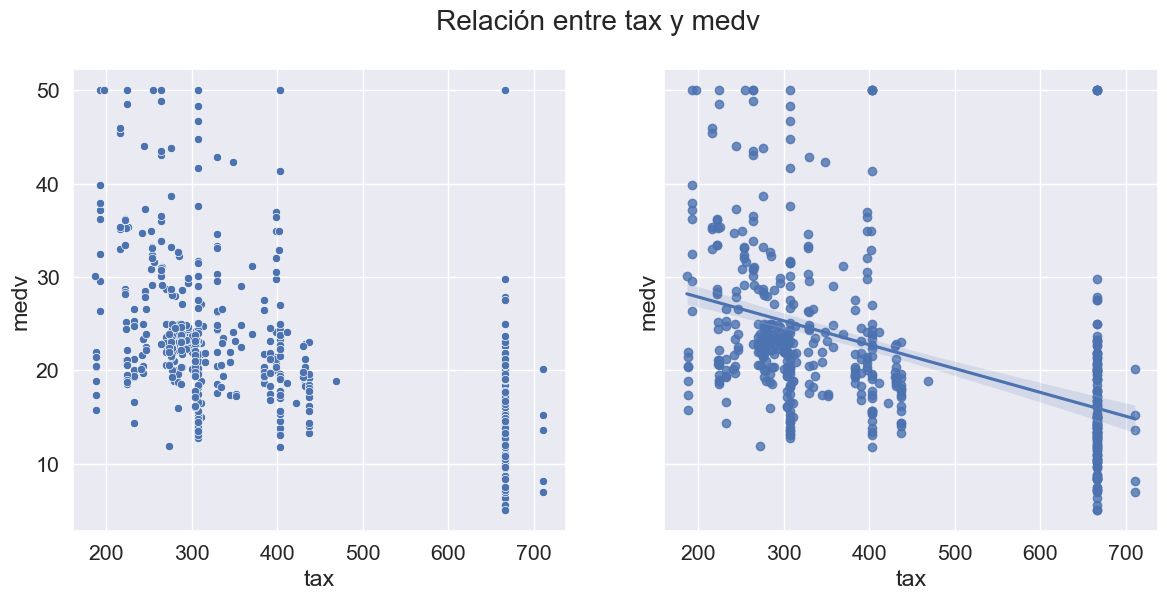

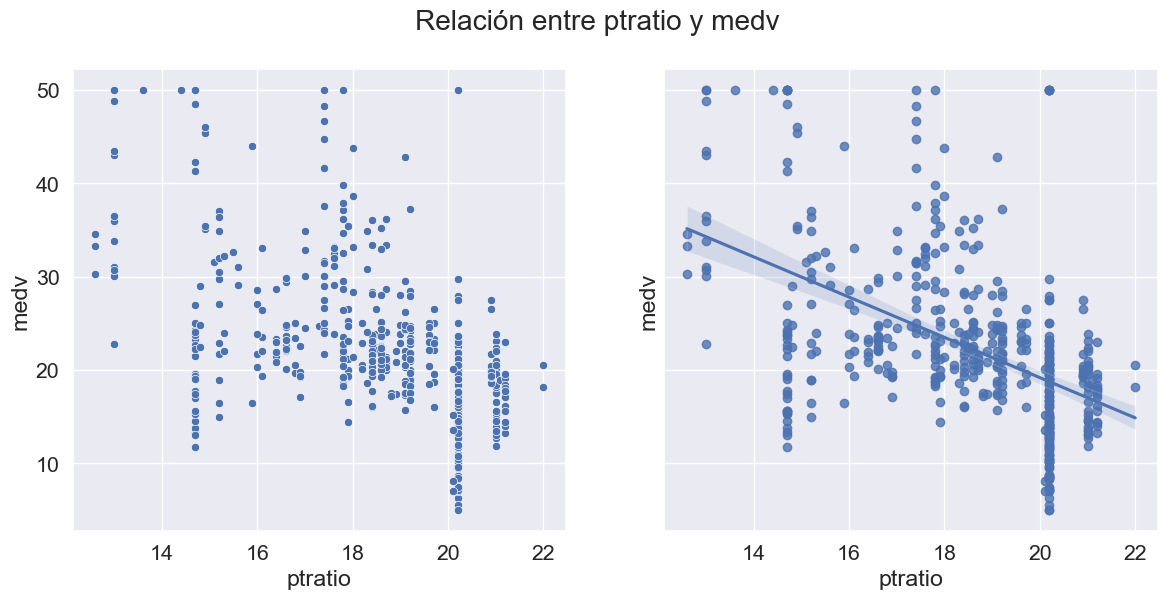

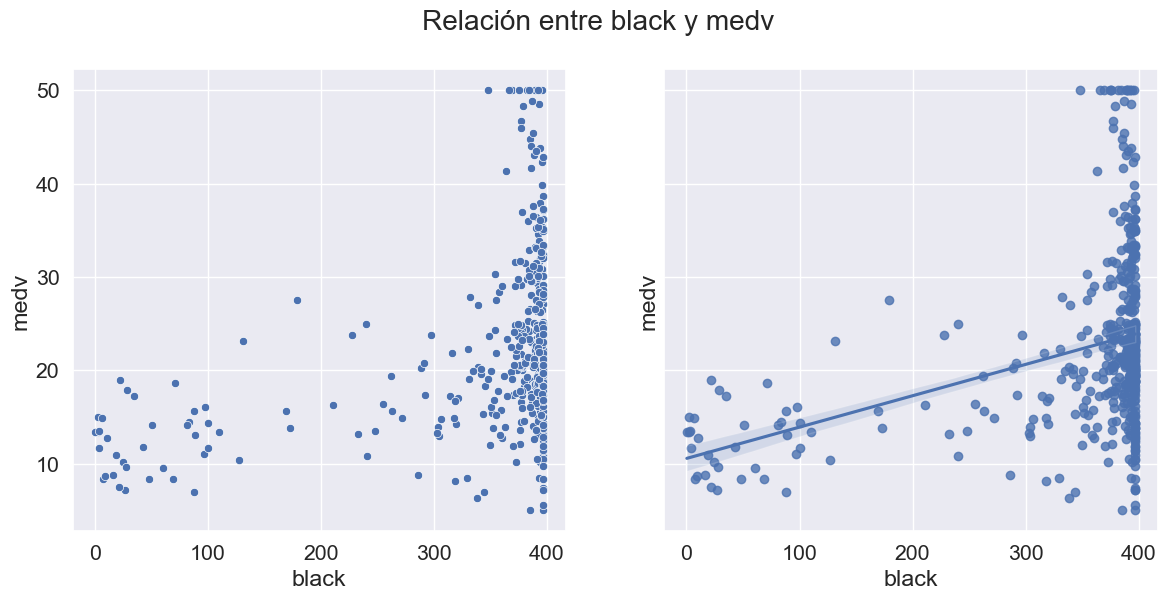

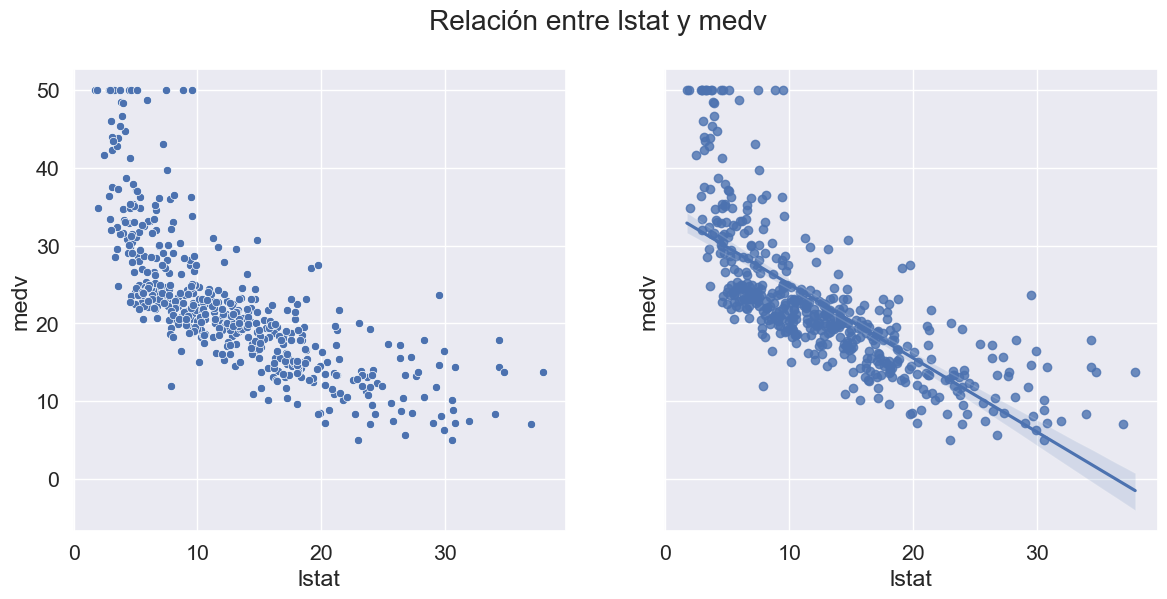

In [27]:
num_cols.remove('medv')
for col in num_cols:
    scatter_regplot(data, col, 'medv')

- Un `mapa de calor` se utiliza ampliamente para este tipo de análisis. El mapa de calor `muestra la correlación entre las variables, ya sea positiva o negativa`.

In [28]:
matplotlib.rc_file_defaults()

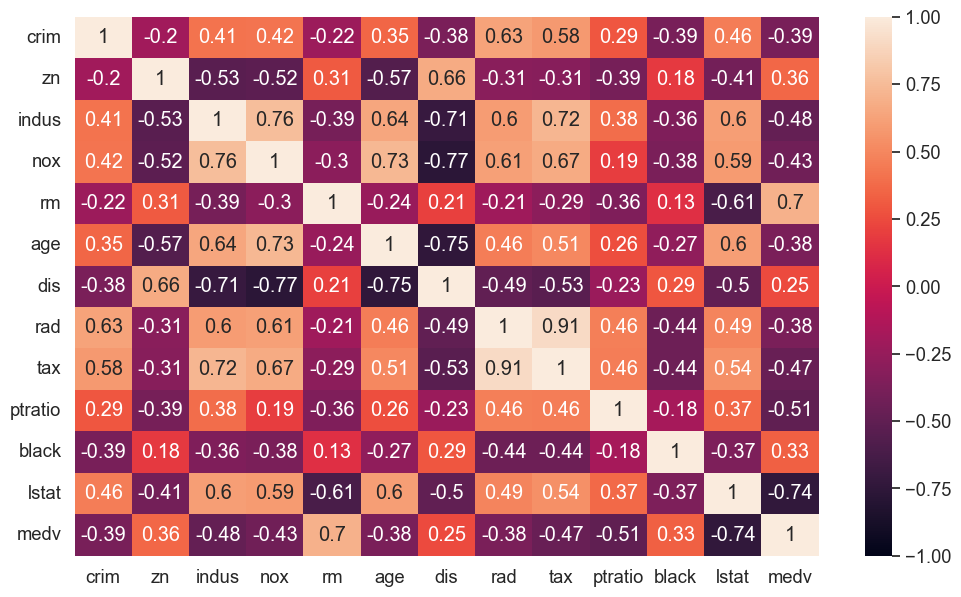

In [29]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['chas', 'black_log', 'crim_log'],axis=1).corr(), annot = True, vmin = -1, vmax = 1);

- A manera de ejemplo, `utilizaremos el dataset mglearn.datasets.load_extended_boston() de las 104 características` resultantes de las 13 características originales junto con las `91 combinaciones posibles de dos características dentro de esas 13`. 

In [30]:
X, y = mglearn.datasets.load_extended_boston()

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

- Al comparar los `score` de los conjuntos de entrenamiento y de prueba, comprobamos que `predecimos con mucha precisión en el conjunto de entrenamiento, pero el` $R^2$ `en el conjunto de prueba es mucho peor`

In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- Esta `discrepancia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba` es un claro signo de `overfitting`, y por lo tanto, debemos tratar de `encontrar un modelo que nos permita controlar la complejidad`. Usualmente, en este tipo de casos utilizamos `técnicas de regularización`. Una de las alternativas más utilizadas a la regresión lineal estándar es la `regresión ridge`, que estudiaremos a continuación.

## Regresión ridge

**`Observación`**

- En la regresión ridge, los coeficientes $\boldsymbol{\hat{\beta}}$ se eligen no sólo para que predigan bien en los datos de entrenamiento, sino que también, para que se ajusten a una `restricción` adicional. `La regresión Ridge regulariza la regresión lineal imponiendo una penalización al tamaño de los coeficientes`.

- `La magnitud de los coeficientes se considera lo más pequeña posible`; en otras palabras, todas las entradas de $\boldsymbol{\hat{\beta}}$ deben ser cercanas a cero. Intuitivamente, esto significa que `cada característica debe tener el menor efecto posible sobre el resultado (lo que se traduce en tener una pendiente pequeña), sin dejar de predecir bien`. Esta restricción es un ejemplo de lo que se llama `regularización`. 

- La `regularización` consiste en `restringir explícitamente un modelo para evitar el overfitting`. El tipo particular utilizado por la `regresión ridge` se conoce como `regularización` $L^2$. 

**`Formulación`**

Consideremos el `modelo de regresión lineal`

$$
y_{i}=\beta_{0}+\beta_{1}\cdot x_{i1}+\beta_{2}\cdot x_{i2}+\cdots+\beta_{p}\cdot x_{ip}+\varepsilon_{i},~i = 1,2,\dots, n,
$$ (linear_model_comp)

basado en los datos observados $\{(y_{i}, x_{i1}, x_{i2},\dots, x_{ip}):~i=1,2,\dots,n\}$ para la variable respuesta $y$ y $p$ variables predictoras $\boldsymbol{x}=(x_{1}, x_{2},\dots,x_{p})$. La `regresión ridge` propuesta por `Hoerl y Kennard (1970)` es un método para `evitar la inestabilidad de las estimaciones en los modelos de regresión lineal, causada por la multicolinealidad`, esto es, `correlación alta entre más de dos variables predictoras`. Este método es una regularización, en la que la `suma de cuadrados de los coeficientes de regresión, excluyendo el intercepto, es el término de penalización`, y las estimaciones de coeficientes de regresión se obtienen de la siguiente manera.

```{admonition} Problema de multicolinealidad
:class: tip, dropdown

Cuando las variables predictoras están correlacionadas, esto indica que los `cambios en una variable están asociados a cambios en otra`. Cuanto más fuerte sea la correlación, más difícil será cambiar una variable sin cambiar otra. `Resulta difícil para el modelo estimar la relación entre cada variable predictora y la variable respuesta de forma independiente` porque las variables predictoras tienden a cambiar al unísono.
```

En primer lugar, obtenemos la `media` $\bar x_{j}=n^{-1}\sum_{i=1}^{n}x_{ij}$ y la `varianza` $s_{j}^2=n^{-1}\sum_{i=1}^{n}(x_{ij}-\bar x_{j})^{2}$, $j=1,2,\dots,p$ de los datos para las variables predictoras y `estandaricemos` los datos de la siguiente manera

$$
z_{ij}=\frac{x_{ij}-\bar x_{j}}{s_{j}},~i=1,2,\dots,n,~j=1,2,\dots,p.
$$ (estand_ridge_reg)

```{admonition} ¿Por qué estandarizar? 
:class: dropdown

La `regresión ridge` regulariza la `regresión lineal` imponiendo una `penalización al tamaño de los coeficientes`. Así, los coeficientes se contraen hacia cero y entre sí. Cuando esto ocurre, si las `variables independientes no tienen la misma escala, la contracción no es justa`. Dos variables independientes con `diferentes escalas tendrán diferentes contribuciones a los términos penalizados`, porque el término penalizado es una suma de cuadrados de todos los coeficientes. Para evitar este tipo de problemas, muy a menudo, las `variables independientes se centran y se escalan` para que tengan varianza unitaria.
```

El modelo de `regresión lineal basado en los datos estandarizados` puede expresarse entonces como

$$
\begin{align*}
y_{i} &= \beta_{0} + \beta_{1}\bar x_{1} + \beta_{2}\bar x_{2} + \cdots + \beta_{p}\bar x_{p} + 
\beta_{1}^{\star}z_{i1} + \beta_{2}^{\star}z_{i2} + \cdots + \beta_{p}^{\star}z_{ip} + \varepsilon_{i}\\
&=\beta_{0}^{\star} + \beta_{1}^{\star}z_{i1} + \beta_{2}^{\star}z_{i2} + \cdots + \beta_{p}^{\star}z_{ip} + \varepsilon_{i},~ i = 1,2,\dots,n,
\end{align*}
$$ (eq_reg_li_z)

donde $\beta_{0}^{\star}=\beta_{0}+\beta_{1}\bar x_{1}+\beta_{2}\bar x_{2}+\cdots+\beta_{p}\bar x_{p}~\text{y}~\beta_{j}^{\star}=s_{j}\beta_{j}$. Por lo tanto, podemos expresar el `modelo de regresión lineal basados en los datos estandarizados` para la variable predictora como

$$
\boldsymbol{y}=\beta_{0}^{\star}\boldsymbol{1}+Z\boldsymbol{\beta}_{s}+\boldsymbol{\varepsilon},
$$ (reg_ridge_model)

en `forma matricial`

$$
\begin{pmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{i}\\
\vdots\\
y_{n}
\end{pmatrix}
=
\beta_{0}^{\star}
\begin{pmatrix}
1\\
1\\
\vdots\\
1\\
\vdots\\
1
\end{pmatrix}
+
\begin{pmatrix}
z_{11} & z_{12} & \cdots & z_{1p}\\
z_{21} & z_{22} & \cdots & z_{2p}\\
\vdots & \vdots & & \vdots\\
z_{31} & z_{32} & \cdots & z_{3p}\\
\vdots & \vdots & & \vdots\\
z_{n1} & z_{n2} & \cdots & z_{np}
\end{pmatrix}
\begin{pmatrix}
\beta_{0}\\[2mm]
\beta_{1}\\[2mm]
\beta_{2}\\
\vdots\\[2mm]
\beta_{p}
\end{pmatrix}
+
\begin{pmatrix}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{i}\\
\vdots\\
\varepsilon_{n}
\end{pmatrix}
$$

donde $\boldsymbol{1}$ es un vector $n$-dimensional de unos, $\boldsymbol{\beta}_{s}=(s_{1}\beta_{1}, s_{2}\beta_{2},\dots,s_{p}\beta_{p})^{T}$, y $Z$ es una matriz de $n\times p$ que contiene los datos estandarizados $z_{ij}=(x_{ij}-\bar x_{j})/s_{j},~ i=1,2,\dots,n; j=1,2,\dots,p$ en su posición $(i,j)$.

El estimador `ridge` para el vector de coeficientes esta dado entonces por `minimización` de:

$$
S_{\lambda}(\beta_{0}^{\star}, \boldsymbol{\beta}_{s})=(\boldsymbol{y}-\beta_{0}^{\star}\boldsymbol{1}-Z\boldsymbol{\beta}_{s})^{T}(\boldsymbol{y}-\beta_{0}^{\star}\boldsymbol{1}-Z\boldsymbol{\beta}_{s})+\lambda\boldsymbol{\beta}_{s}^{T}\boldsymbol{\beta}_{s}
$$ (ridge_coeff_stand)

donde el `termino de regularización` $L^2$: ($\lambda\boldsymbol{\beta}_{s}^{T}\boldsymbol{\beta}_{s}$) con `parámetro de regularización` $\lambda$ ha sido agregado al `vector de coeficientes de regresión, excepto el intercepto`. Este término es conocido como `weight decay`. Veamos una simulación de la `regularización ridge` usando a la [matriz de Hilbert](https://es.wikipedia.org/wiki/Matriz_de_Hilbert) como input y un `vector unitario`, como output.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [8]:
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [9]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

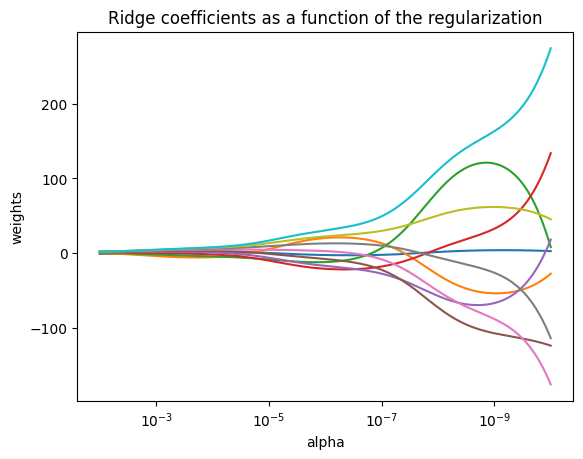

In [12]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight");

La Eq. {eq}`ridge_coeff_stand` puede `reescribirse` de la siguiente forma al `desarrollar los productos asociados y aplicar propiedades de la transpuesta`

$$
S_{\lambda}(\beta_{0}^{\star}, \boldsymbol{\beta}_{s})=\boldsymbol{y}^{T}\boldsymbol{y}-2\boldsymbol{y}^{T}\beta_{0}^{\star}\boldsymbol{1}-2\boldsymbol{y}^{T}Z\boldsymbol{\beta}_{s}+2\beta_{0}\textcolor{red}{\boldsymbol{1}^{T}Z}\boldsymbol{\beta}_{s}+n\beta_{0}^{\star^{2}}+\boldsymbol{\beta}_{s}^{T}Z^{T}Z\boldsymbol{\beta}_{s}+\lambda\boldsymbol{\beta}_{s}^{T}\boldsymbol{\beta}_{s}
$$

Diferenciando con respecto a $\beta_{0}^{\star}$ y $\boldsymbol{\beta}_{s}$ para resolver el `problema de minimización`, obtenemos las siguientes ecuaciones: 

$$
\begin{align*}
\frac{\partial S_{\lambda}(\beta_{0}^{\star}, \boldsymbol{\beta}_{s})}{\partial\beta_{0}^{\star}}&=-2n\overline{y}+2n\beta_{0}^{\star}=0
\end{align*}
$$ (eq_betaz)

Nótese que $Z^{T}\boldsymbol{1}=Z^{T}\boldsymbol{1}=0$ `(verifíquelo)`. Para el caso de la derivada parcial con respecto a $\boldsymbol{\beta}_{s}$ se requiere antes, estudiar la `derivada de una forma cuadrática` de la forma $\boldsymbol{x}^{T}A\boldsymbol{x}$. Nótese que

$$
\begin{align*}
\boldsymbol{x}^{T}A\boldsymbol{x}&=(x_{1}, x_{2},\dots, x_{p})
\begin{pmatrix}
A_{11} & A_{12} & \cdots & A_{1p}\\
A_{21} & A_{22} & \cdots & A_{2p}\\
\vdots\\
A_{31} & A_{32} & \cdots & A_{3p}\\
\vdots\\
A_{p1} & A_{p2} & \cdots & A_{pp}
\end{pmatrix}
\begin{pmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{p}
\end{pmatrix}
% &=\left(\sum_{i=1}^{p}x_{i}A_{i1}, \sum_{i=1}^{p}x_{i}A_{i2},\dots, \sum_{i=1}^{p}x_{i}A_{ip}\right)
% \begin{pmatrix}
% x_{1}\\
% x_{2}\\
% \vdots\\
% x_{p}
% \end{pmatrix}\\
=\sum_{j=1}^{p}\left(\sum_{i=1}^{p}x_{i}A_{ij}\right)x_{j}
\end{align*}
$$

Derivando con respecto a $x_{k}$ para obtener la $k$`-ésima componente del gradiente` $\nabla_{\boldsymbol{x}}(\boldsymbol{x}^{T}A\boldsymbol{x})$

$$
\begin{align*}
\frac{\partial(\boldsymbol{x}^{T}A\boldsymbol{x})}{\partial x_{k}}&=
\frac{\partial}{\partial x_{k}}\left[\sum_{j=1}^{p}\left(\sum_{i=1}^{p}x_{i}A_{ij}\right)x_{j}\right]\\
&=\sum_{j=1}^{p}\left(\sum_{i=1}^{p}\frac{\partial x_{i}}{\partial x_{k}}A_{ij}\right)x_{j}+
\sum_{j=1}^{p}\frac{\partial x_{j}}{\partial x_{k}}\left(\sum_{i=1}^{p}x_{i}A_{ij}\right)\\
&=\sum_{j=1}^{p}A_{kj}x_{j}+\sum_{i=1}^{p}x_{i}A_{ik}
\end{align*}
$$

Por lo tanto, para $k=1,2,\dots,p$, `bajo el supuesto de simetría` para $A$ se tiene que

$$
\begin{align*}
\frac{\partial(\boldsymbol{x}^{T}A\boldsymbol{x})}{\partial\boldsymbol{x}}&=
\begin{pmatrix}
\displaystyle{\sum_{j=1}^{p}A_{1j}x_{j}+\sum_{i=1}^{p}x_{i}A_{i1}}\\
\displaystyle{\sum_{j=1}^{p}A_{2j}x_{j}+\sum_{i=1}^{p}x_{i}A_{i2}}\\
\vdots\\
\displaystyle{\sum_{j=1}^{p}A_{pj}x_{j}+\sum_{i=1}^{p}x_{i}A_{ip}}
\end{pmatrix}\\
&=A\boldsymbol{x}+A^{T}\boldsymbol{x}\\
&=(A+A^{T})\boldsymbol{x}\\
&=2A\boldsymbol{x}
\end{align*}
$$

`Nótese que` $A:=Z^{T}Z$, `es simétrica`, en efecto: $A^{T}=(Z^{T}Z)^{T}=Z^{T}(Z^{T})^{T}=Z^{T}Z=A$, entonces $\partial_{\boldsymbol{\beta}_{s}}(\boldsymbol{\beta}_{s}^{T}Z^{T}Z\boldsymbol{\beta}_{s})=2Z^{T}Z\boldsymbol{\beta}_{s}$, por lo tanto

$$
\begin{align*}
\frac{\partial S_{\lambda}(\beta_{0}^{\star},\boldsymbol{\beta}_{s})}{\partial\boldsymbol{\beta}_{s}}=-2Z^{T}\boldsymbol{y}+2Z^{T}Z\boldsymbol{\beta}_{s}+2\lambda\boldsymbol{\beta}_{s}=\boldsymbol{0}
\end{align*}
$$ (eq_betas)

`Resolviendo las ecuaciones` {eq}`eq_betaz` y {eq}`eq_betas` para $\beta_{0}^{\star}$ y $\boldsymbol{\beta}_{s}$, se tienen `estimadores ridge` para el modelo de regresión {eq}`eq_reg_li_z`

$$
\hat{\beta}_{0}^{\star}=\overline{y}\quad\text{y}\quad\hat{\boldsymbol{\beta}}_{s}=(Z^{T}Z+\lambda I_{p})^{-1}Z^{T}\boldsymbol{y}
$$

Dado que $\beta_{0}^{\star}=\beta_{0}+\beta_{1}\bar x_{1}+\beta_{2}\bar x_{2}+\cdots+\beta_{p}\bar x_{p}$ `usando la estimación obtenida` $\hat{\beta}_{0}^{\star}$ se tiene que

$$
\hat{\beta}_{0}=\overline{y}-\hat{\beta}_{1}\bar x_{1}-\hat{\beta}_{2}\bar x_{2}-\cdots-\hat{\beta}_{p}\bar x_{p}.
$$

Además, la `estimación ridge del vector de coeficientes de regresión`, está dada separadamente por la `minimización de la función`

$$
S_{\lambda}(\boldsymbol{\beta}_{s})=(\boldsymbol{y}-Z\boldsymbol{\beta}_{s})^{T}(\boldsymbol{y}-Z\boldsymbol{\beta}_{s})+\lambda\boldsymbol{\beta}_{s}^{T}\boldsymbol{\beta}_{s}.
$$

`En efecto`, para obtener `estimación ridge del vector de coeficientes` $\boldsymbol{\beta}_{s}=(\hat{\beta}_{1}, \hat{\beta}_{2},\dots, \hat{\beta}_{p})$, primero, nótese que al reemplazar $\hat{\beta}_{0}^{\star}=\overline{y}$ en Eq. {eq}`reg_ridge_model` se tiene que $y=\overline{y}\boldsymbol{1}+Z\boldsymbol{\beta}_{s}+\varepsilon$, entonces $\boldsymbol{y}-\overline{y}\boldsymbol{1}$ esta `centrando los datos en relación a la variable respuesta`.

`Estandarizando las variables predictoras y respuesta` en nuestro modelo inicial Ecuación {eq}`linear_model_comp`, mediante $y_{i}-\overline{y}$ y $(x_{ij}-\bar x_{j})/s_{j}$ se tienen las siguientes igualdades, `verifiquelas`

$$
\sum_{i=1}^{n}y_{i}=0,\quad\sum_{i=1}^{n}x_{ij}=0,~j=1,2,\dots,p,\quad\sum_{i=1}^{n}x_{ij}^{2}=n
$$ (ridge_normalization)

Entonces, 

$$
\beta_{0}^{\star}=\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_{i}=0.
$$

`En virtud de la implicación` de estas igualdades con respecto al parámetro $\beta_{0}^{\star}$ y la Ecuación {eq}`eq_reg_li_z`, podemos `considerar sin perdida de generalidad`, el modelo de regresión

$$
y=X\boldsymbol{\beta}+\boldsymbol{\varepsilon},
$$

donde $X\in\mathbb{R}^{n\times p},~\boldsymbol{\beta}\in\mathbb{R}^{p},~E(\boldsymbol{\varepsilon})=0$ y $\textrm{cov}(\boldsymbol{\varepsilon})=\sigma^2\boldsymbol{I}$.

Por lo tanto `minimizando el operador` $S_{\lambda}(\boldsymbol{\beta})=(y-X\boldsymbol{\beta})^{T}(y-X\boldsymbol{\beta})+\lambda\boldsymbol{\beta}^{T}\boldsymbol{\beta}$, de `forma análoga al procedimiento de optimización para` Eq. {eq}`ridge_coeff_stand`, obtenemos el estimador de ridge:

$$
\hat{\boldsymbol{\beta}}_{R}=(X^{T}X+\lambda\boldsymbol{I}_{p})^{-1}X^{T}\boldsymbol{y}.
$$

```{prf:property} Propiedades del estimador ridge
:label: prop_ridge_estimador

El `estimador ridge` satisface las siguientes propiedades:

$$
\begin{align}
E(\hat{\boldsymbol{\beta}}_{R})&=(X^{T}X+\lambda\boldsymbol{I}_{p})^{-1}X^{T}X\boldsymbol{\beta}\\
\textrm{cov}(\boldsymbol{\beta}_{R})&=\sigma^{2}(X^{T}X+\lambda\boldsymbol{I}_{p})^{-1}X^{T}X(X^{T}X+\lambda\boldsymbol{I}_{p})^{-1}\\
E(\hat{\boldsymbol{\beta}}_{R}-\boldsymbol{\beta})&=-\lambda(X^{T}X+\lambda\boldsymbol{I}_{p})^{-1}\boldsymbol{\beta}\\
E[(\hat{\boldsymbol{\beta}}_{R}-\boldsymbol{\beta})^{T}(\hat{\boldsymbol{\beta}}_{R}-\boldsymbol{\beta})]&=\displaystyle{\sigma^{2}\sum_{j=1}^{p}\frac{l_{j}}{(l_{j}+\lambda)^{2}}+\lambda^{2}\boldsymbol{\beta}^{T}(X^{T}X+\lambda\boldsymbol{I}_{p})^{-2}\boldsymbol{\beta}},
\end{align}
$$ (ridge_props)

donde $l_{1}, l_{2},\dots, l_{p}$ son los `autovalores ordenados` de $X^{T}X$. El primer término del lado derecho de la última ecuación en {eq}`ridge_props` representa la suma de las `varianzas de los componentes del estimador ridge`, y el segundo término es el `cuadrado del sesgo`.
```

```{admonition} Ejercicio para el lector
:class: tip
Queda como `ejercicio para el lector verificar las Propiedades` {any}`ridge_props` del `estimador ridge`. *Sugerencia: Revisar el texto de Sadanori Konishi*, `Introduction to Multivariate Analysis: Linear and Nonlinear Modeling` {cite}`konishi2014introduction`.
```

- La `regresión ridge` se implementa en `linear_model.Ridge`. Veamos qué tal lo hace en el conjunto de datos ampliado de `Boston Housing`.

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- Como puede ver, `el score en el conjunto de entrenamiento de Ridge es menor que el de la regresión lineal`, cuyos puntajes fueron: **Training set score: 0.95 and Test set score: 0.61**. Además, `la puntuación en el conjunto de prueba es mayor`. En este caso, `Ridge`, usa `alpha=1.0` como parámetro por default (ver [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)). Esto es coherente con nuestras expectativas. `Con la regresión, nos ajustamos demasiado a los datos`. `Ridge es un modelo más restringido, por lo que existe menos probabilidad de overfitting`. Un modelo `menos complejo` significa un `peor rendimiento en el conjunto de de entrenamiento, pero uno mejor generalización`. `Como sólo nos interesa el rendimiento de la generalización, deberíamos elegir el modelo Ridge en lugar del modelo de regresión lineal`.

- El modelo `Ridge` hace un `balance entre la simplicidad del modelo (coeficientes casi nulos) y su rendimiento en el conjunto de entrenamiento`. La importancia que el modelo da a la simplicidad frente al rendimiento del conjunto de entrenamiento, puede ser `especificada por el usuario`, utilizando el parámetro `alpha`. En el ejemplo anterior, hemos utilizado el parámetro por defecto `alpha=1.0`. Sin embargo, no hay ninguna razón por la que este nos dió la mejor compensación. El ajuste óptimo de `alpha` depende del conjunto de datos concreto que estemos utilizando. `Aumentar alpha obliga a los coeficientes a acercarse más a cero, lo que disminuye el rendimiento del conjunto de entrenamiento, pero puede ayudar a la generalización`.

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


- La disminución de `alpha` permite que los coeficientes estén menos restringidos. `Para valores muy pequeños de alpha, los coeficientes apenas están restringidos, y terminamos con un modelo que se parece a LinearRegression`

In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- Aquí, `alpha=0.1` parece funcionar bien. Podríamos intentar disminuir `alpha` aún más para mejorar la generalización. Por ahora, observe cómo el parámetro `alpha` se corresponde con la complejidad del modelo. `Discutiremos los métodos para seleccionar adecuadamente los parámetros en el capítulo de evaluación de modelos`. También podemos obtener una visión más cualitativa de cómo el parámetro `alpha` cambia el modelo, inspeccionando el atributo `coef_` de los modelos con diferentes valores de `alpha`. Un `alpha` más alto significa un modelo más restringido, por lo que esperamos que las entradas de `coef_` tengan una magnitud menor.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

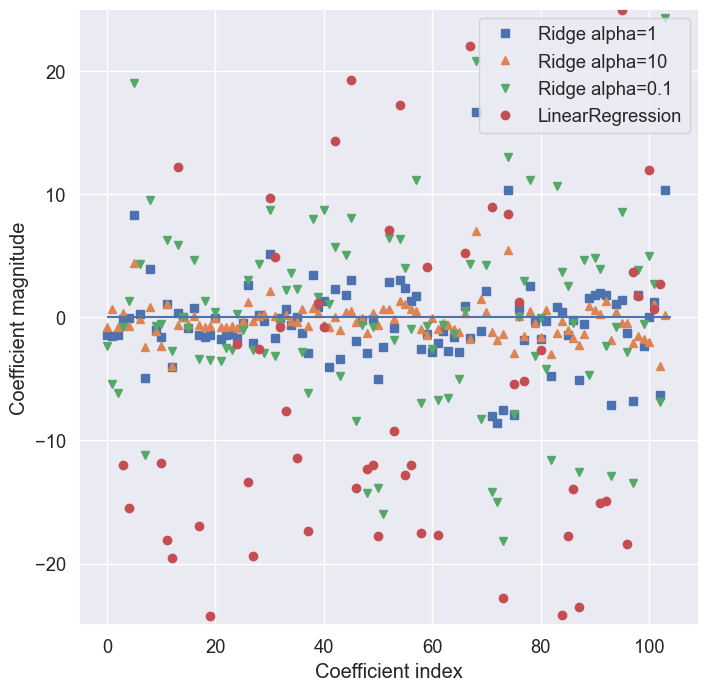

In [39]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 8))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();

- Aquí, el eje $x$ enumera las entradas de `coef_`. $x=0$ muestra el `coeficiente asociado a la primera característica`, $x=1$ el `coeficiente asociado a la segunda característica`, y así sucesivamente hasta $x=100$. El eje $y$ muestra los `valores numéricos de los valores correspondientes de los coeficientes`. La principal conclusión es que para `alpha=10`, los coeficientes se sitúan en su mayoría entre -3 y 3. Los coeficientes del modelo `Ridge` con `alpha=1` son algo mayores. Los puntos correspondientes a `alpha=0,1` tienen una magnitud aún mayor, y muchos de los puntos correspondientes a la `regresión lineal sin ninguna regularización` (que sería `alpha=0`), son tan grandes que quedan fuera del gráfico.

- Otra forma de entender la influencia de la regularización es fijar un valor de `alpha` pero variando la cantidad de datos de entrenamiento disponibles. Si submuestreamos el conjunto de datos de `Boston Housing` y evaluamos `LinearRegression` y `Ridge(alpha=1)` en subconjuntos de tamaño creciente, obtenemos la siguiente `curva de aprendizaje`

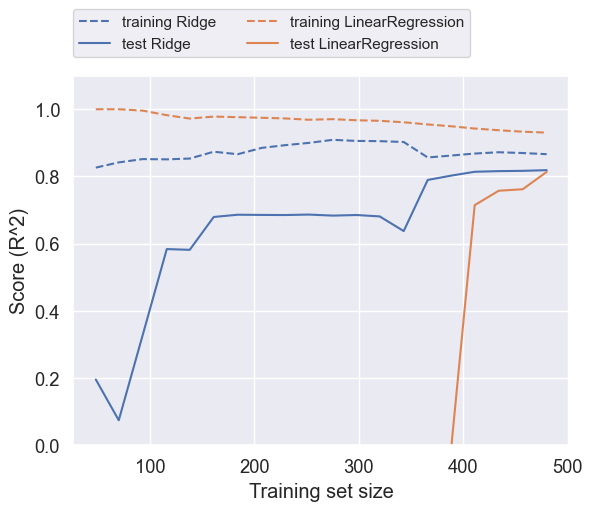

In [40]:
mglearn.plots.plot_ridge_n_samples()

- Como era de esperarse, la `puntuación de entrenamiento es mayor que la de prueba para todos los tamaños de conjuntos de datos`, tanto para la `regresión lineal` como para la `ridge`. Debido a que la `regresión ridge está regularizada, la puntuación de entrenamiento es inferior a la de la regresión lineal en todos los casos`. Sin embargo, la puntuación de la prueba de la regresión ridge es mejor, en particular, para los subconjuntos pequeños de datos. `Para menos de 400 puntos de datos, la regresión lineal no es capaz de aprender nada`. `A medida que el modelo dispone de más datos, ambos modelos mejoran, y la regresión lineal alcanza a la ridge.`

## Lasso

**`Observación`**

- Una alternativa a la `regresión ridge` para regularizar la `regresión lineal` es la `regresión lasso`. Al igual que con la regresión `ridge`, el uso de `lasso` también `restringe los coeficientes para que sean cercanos a cero, pero de una forma ligeramente diferente, llamada regularización` $L^1$. 

- La consecuencia de la regularización $L^1$ es que `cuando se utiliza lasso, algunos coeficientes son exactamente cero`. Esto significa que `algunas características son totalmente ignoradas por el modelo`. Esto puede verse como una `forma de selección automática de de características.` 

- El hecho de que algunos coeficientes sean exactamente cero a menudo hace que un `modelo sea más fácil de interpretar, y puede revelar las características más importantes de un modelo`.

**`Formulación`**

El método `Lasso` es un método de estimación de parámetros del modelo mediante la `minimización de la siguiente función objetivo`, que impone la suma de valores absolutos (normas $L^{1}$) de los coeficientes de regresión como una `restricción (penalización) a la suma de errores al cuadrado`:

$$
S_{\lambda}(\boldsymbol{\beta})=(y-X\boldsymbol{\beta})^{T}(y-X\boldsymbol{\beta})+\lambda\sum_{i=1}^{p}|\beta_{j}|,
$$

donde los datos observados están normalizados como en la Ecuación {eq}`ridge_normalization`. `A diferencia de la contracción de los coeficientes de regresión hacia cero, que se produce en la regresión de ridge, lasso da lugar a una estimación exactamente igual a cero para algunos de los coeficientes.`

Una ventaja de la regresión `ridge` es que si $p < n$ (`número de variables predictoras menor que el número de observaciones`), entonces con una selección adecuada del parámetro de regularización $\lambda$, `es posible obtener estimaciones estables de los coeficientes de regresión, incluso en casos que impliquen multicolinealidad entre las variables predictoras` o en los que $X^{T}X$ es aproximadamente singular para la matriz de diseño $X$. Sin embargo, debido a que, a diferencia de `lasso`, la regresión `ridge no puede producir estimaciones exactamente iguales a cero`, entonces, la regresión `ridge no puede utilizarse como método de selección de variables`.

```{figure} ./imgs/ridge_lasso.png
:name: fig_ridge_lasso
:align: center
:scale: 15

Estimación ridge (izquierda) y estimación lasso (derecha).
```

La diferencia entre la estimación lasso y la estimación ridge puede demostrarse, para simplificar, para el caso de sólo dos variables predictoras $x_{1}$ y $x_{2}$. `En la estimación ridge, la solución se basa en la restricción` $\beta_{1}^{2}+\beta_{2}^{2}\leq c_{1}$ de minimizar

$$
S(\beta_{1}, \beta_{2})=\sum_{i=1}^{n}\left(y_{i}-\sum_{j=1}^{2}\beta_{j}x_{ij}\right)^{2},
$$

para datos centrados, mientras que `la estimación lasso se basa en la restricción` $|\beta_{1}|+|\beta_{2}|\leq c_{2}$.

- Dado que la `estimación por mínimos cuadrados es la solución que minimiza` $S(\beta_{1}, \beta_{2})$, `esta se produce en el centro de una elipse`. Sin embargo, como se muestra en la {numref}`fig_ridge_lasso`, las soluciones que satisfacen las restricciones en las `estimaciones ridge se encuentran en regiones diferentes de las que satisfacen las restricciones en las estimaciones lasso`.

- La diferencia esencial entre la estimación ridge y la estimación lasso como se muestra en la {numref}`fig_ridge_lasso`, es que `la estimación ridge reduce todas las estimaciones del coeficiente de regresión hacia, pero no exactamente cero`, en relación con las correspondientes a los mínimos cuadrados, mientras que `la estimación lasso localiza algunas de las estimaciones del coeficiente de regresión exactamente iguales a cero`. Debido a su característica de reducir algunos coeficientes a exactamente cero, `lasso también puede utilizarse para la selección de variables en modelos a gran escala con muchas variables predictoras`, para las que el parámetro de regularización $\lambda$ afecta al grado de de esparcimiento de la solución.

```{admonition} Ejercicio para el lector
:class: tip
Queda como `ejercicio para el lector, encontrar parámetros de estimación lasso`, tal como se realizó en el caso de la regresión ridge. `¿Pueden ser obtenidos analíticamente?`. Se sugiere investigar sobre el algoritmo LARS (Least Angle Regression) de Efron et al. (2004).
```

## Aplicación: Regresión Lasso

- Apliquemos `lasso` al conjunto de datos ampliado de `Boston Housing`

In [41]:
import numpy as np

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


- Como se puede ver, `Lasso` lo hace bastante mal, tanto en el conjunto de entrenamiento como en el de prueba. Esto indica `underfitting`, pero, nótese que sólo utilizó 4 de las 105 características (`feature selection`). De forma similar a `Ridge`, `Lasso` también tiene un parámetro de regularización, `alpha`, que `controla la fuerza con la que los coeficientes son empujados hacia cero`. En el ejemplo anterior, utilizamos el valor por defecto de `alpha=1.0`. Para reducir `underfitting`, intentemos disminuir `alpha`. Cuando hacemos esto, también necesitamos aumentar el ajuste por defecto de `max_iter` (`número máximo de iteraciones a ejecutar`)

In [43]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


- `Un alpha más bajo nos permitió ajustar un modelo más complejo`, que funcionó mejor en los datos de entrenamiento y de prueba. El rendimiento es ligeramente mejor que utilizando `Ridge`, y `estamos utilizando sólo 33 de las 105 características. Esto hace que este modelo sea potencialmente más fácil de entender`. Sin embargo, `si fijamos alpha demasiado bajo, volvemos a eliminar el efecto de la regularización y acabamos en overfitting`, con un resultado similar al de `LinearRegression`

In [44]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


- Una vez más, podemos `trazar los coeficientes de los diferentes modelos`

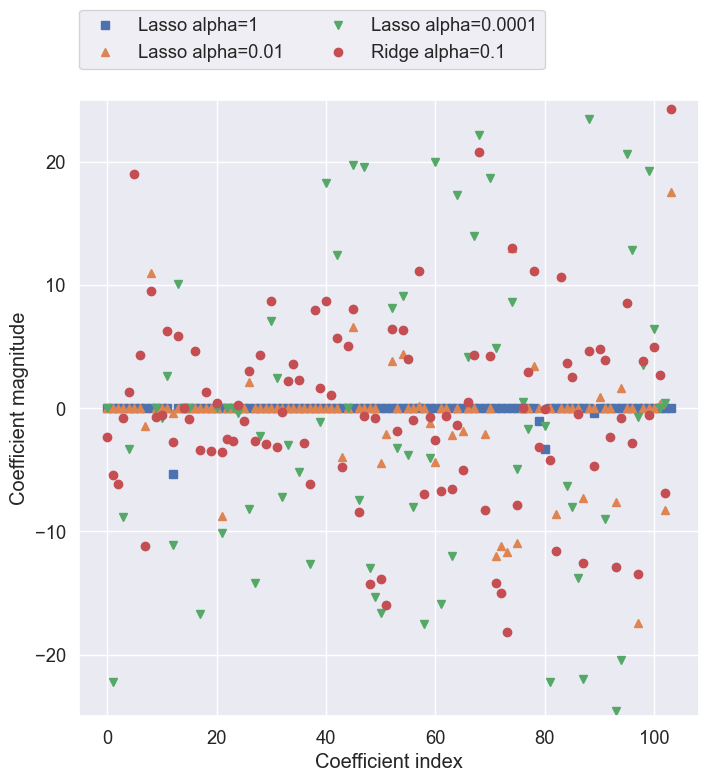

In [45]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 8))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

- Para `alpha = 1`, no sólo vemos que la mayoría de los coeficientes son cero (algo que ya sabíamos), sino que los coeficientes restantes también son de pequeña magnitud. Disminuyendo `alpha a 0.01 , obtenemos la solución mostrada en triángulos salmones, que hace que la mayoría de las características sean exactamente cero`. Utilizando `alpha = 0.0001, obtenemos un modelo bastante poco regularizado, con la mayoría de los coeficientes no nulos y de gran magnitud`. A modo de comparación, la mejor solución `Ridge` se muestra con puntos rojos. El modelo `Ridge con alpha = 0.1 tiene un rendimiento predictivo similar al del modelo lasso con alpha = 0.01, pero utilizando Ridge, todos los coeficientes son distintos de cero`.

- En la práctica, la regresión `ridge suele ser la primera opción entre estos dos modelos`. Sin embargo, `si tiene una gran cantidad de características y espera que sólo unas pocas sean importantes, Lasso podría ser una mejor opción`. Del mismo modo, si desea tener un modelo que es fácil de interpretar, `Lasso proporcionará un modelo que es más fácil de entender, ya que seleccionará sólo un subconjunto de las características de entrada`. `scikit-learn` también proporciona la clase `ElasticNet`, que combina las penalizaciones de `Lasso` y `Ridge`. En la práctica, esta combinación funciona mejor, aunque al precio de tener dos parámetros que ajustar: uno para la regularización $L^1$, y otro para la regularización $L^2$.

## Modelos lineales para clasificación

- `Los modelos lineales también se utilizan ampliamente para la clasificación`. Veamos primero la `clasificación binaria`. En este caso, la predicción se realiza mediante la siguiente fórmula

$$
\hat{y}=\beta_{0}+\beta_{1}\cdot x_{1}+\beta_{2}\cdot x_{2}+\cdots+\beta_{p}\cdot x_{p}
$$ (linear_class)

- La fórmula es muy similar a la de la regresión lineal, pero `en lugar de devolver simplemente la suma ponderada de las características, ponemos un umbral al valor predicho en cero`. `Si la función es menor que cero, predecimos la clase -1; si es mayor que cero, predecimos la clase +1`. Esta regla de predicción es común a todos los modelos lineales de clasificación. De nuevo, hay muchas formas diferentes de encontrar los coeficientes $\boldsymbol{\beta}$.

- En los modelos lineales de regresión, la salida, $\hat{y}$, `es una función lineal de las características`: una `línea`, un `plano` o un `hiperplano`. En los modelos lineales de clasificación, la frontera de decisión es una función lineal de la entrada. En otras palabras, un `clasificador lineal (binario) es un clasificador que separa dos clases utilizando una línea, un plano o un hiperplano`.

- Hay muchos algoritmos para aprender modelos lineales. Todos estos algoritmos difieren en los dos aspectos siguientes:

    - La forma en que miden `que tan bien una combinación particular de coeficientes se ajusta a los datos de entrenamiento.`
    - `Si utilizan regularización, de que tipo utilizan`

- Los distintos algoritmos eligen diferentes formas de medir lo que significa `"ajustarse bien al conjunto de entrenamiento"`. Por razones técnicas matemáticas, no es posible ajustar $\boldsymbol{\beta}$ para minimizar el número de clasificaciones erróneas que producen los algoritmos, como cabría esperar. 

- Los dos algoritmos de clasificación lineal más comunes son la `regresión logística`, implementada en `linear_model.LogisticRegression`, y las `máquinas de vectores de soporte lineales (SVMs lineales)`, implementadas en `svm.LinearSVC (SVC significa clasificador de vectores de soporte)`.

- A pesar de su nombre, `LogisticRegression` es un algoritmo de clasificación y no de regresión, por lo tanto no debe confundirse con `LinearRegression`. Podemos aplicar los modelos `LogisticRegression` y `LinearSVC` al conjunto de datos `forge` y visualizar la forntera de decisión encontrado por los modelos lineales.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
sns.set_style("darkgrid")

In [47]:
X, y = mglearn.datasets.make_forge()

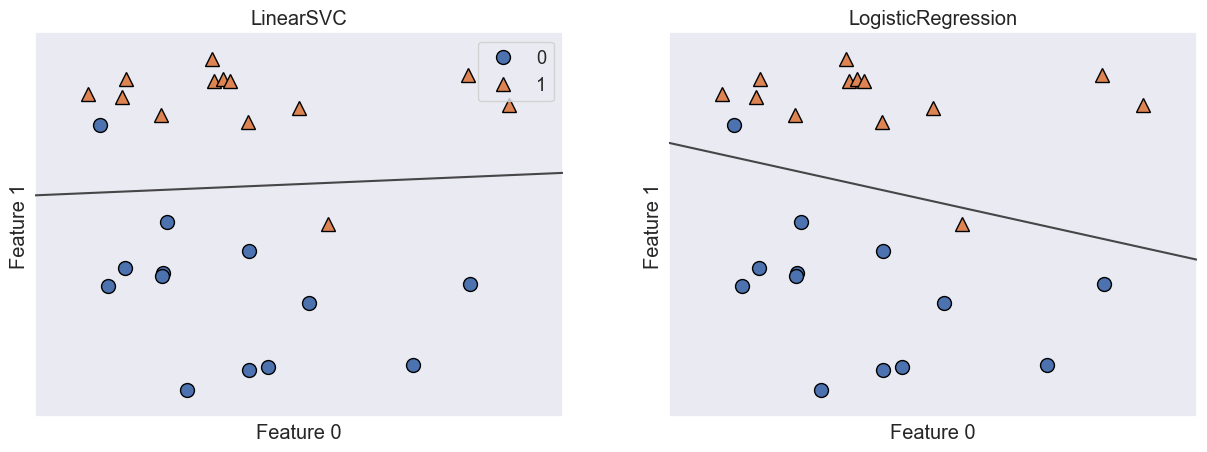

In [48]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

- En esta figura, tenemos la primera característica del conjunto de datos `forge` en el eje $x$ y la segunda característica en el eje $y$, como antes. Se muestran las `fronteras de decisión encontrados por LinearSVC y LogisticRegression` respectivamente como `líneas rectas, separando el área clasificada como clase 1 en la parte superior, del área clasificada como clase 0 en la parte inferior`. En otras palabras, cualquier nuevo punto de datos que se encuentre por encima de la línea negra será clasificado como clase 1 por el clasificador respectivo, mientras que cualquier punto que se encuentre por debajo de la línea negra será clasificado como clase 0.

- Los dos modelos entregan fronteras de decisión similares. `Obsérvese que ambos clasifican erróneamente dos de los puntos. Por defecto, ambos modelos aplican una regularización` $L^{2}$, `de la misma manera que lo hace Ridge para la regresión`. Para `LogisticRegression` y `LinearSVC` el parámetro de compensación que determina la fuerza de la regularización se llama `C`, y `los valores más altos de C corresponden a menor regularización`. En otras palabras, cuando se utiliza un valor alto para el parámetro `C`, `LogisticRegression` y `LinearSVC` intentan ajustarse al conjunto de entrenamiento lo mejor posible, mientras que con valores bajos del parámetro `C`, los modelos ponen más énfasis en encontrar un vector de coeficientes $\boldsymbol{\beta}$ que se acerque a cero.

- Hay otro aspecto interesante de cómo actúa el parámetro `C`. El uso de `valores bajos de C harán que los algoritmos traten de ajustarse a la "mayoría" de los puntos de datos`, mientras que `el uso de un valor más alto de C enfatiza la importancia de que cada punto de datos individual sea clasificado correctamente`. Veamos una ilustración utilizando `LinearSVC`

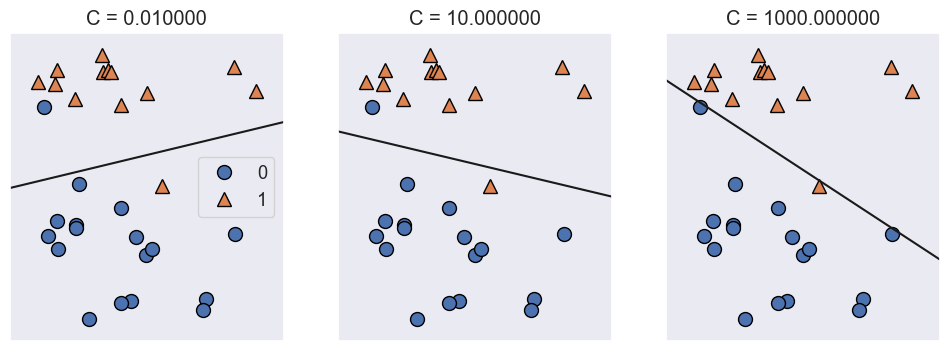

In [49]:
mglearn.plots.plot_linear_svc_regularization();

- En el lado izquierdo, tenemos un `valor de` $C$ `muy pequeño` ($C=0.01$) `que corresponde a una gran regularización`. La mayoría de los puntos de la clase 0 están en la parte superior, y la mayoría de los puntos de la clase 1 están en la parte inferior. `El modelo fuertemente regularizado elige una línea relativamente horizontal, clasificando erróneamente dos puntos`. 

- En el gráfico central, $C$ es ligeramente más alto ($C=10$), y `el modelo se centra más en las dos muestras mal clasificadas, inclinando el límite de decisión`. Por último, en el lado derecho, correspondiente al `valor mas alto de` $C$ ($C=1000$), `el modelo inclina mucho mas la frontera de decisión, clasificando ahora correctamente todos los puntos de la clase 0`. Solo `uno de los puntos de la clase 1 sigue estando mal clasificado`, ya que no es posible clasificar correctamente todos los puntos de este conjunto de datos utilizando una línea recta. 

- `El modelo ilustrado en la parte derecha se esfuerza por clasificar correctamente todos los puntos, pero puede que no capte bien la disposición general de las clases. En otras palabras, es probable que este modelo presente overfitting`. Al igual que en el caso de la regresión, los modelos lineales de clasificación pueden parecer muy restrictivos en espacios de baja dimensión, ya que sólo permiten límites de decisión que sean líneas rectas o planos. De nuevo, `en dimensiones altas, los modelos lineales de clasificación se vuelven muy potentes, y la protección contra el overfitting es cada vez más importante cuando se consideran más características`.

- Analicemos `LinearLogistic` con más detalle en el conjunto de datos de `cáncer de mama`:

In [50]:
from sklearn.datasets import load_breast_cancer

In [51]:
cancer = load_breast_cancer()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.965


- El valor por defecto de $C=1$ proporciona un rendimiento bastante bueno, con una `precisión del 95% tanto en el conjunto de entrenamiento como en el de prueba`. Intentemos aumentar $C$ para ajustar un modelo más flexible:

In [53]:
logreg100 = LogisticRegression(C=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.960
Test set score: 0.958


- El uso de $C=1000000$ da lugar a una `mayor precisión en el conjunto de entrenamiento`. También podemos investigar qué ocurre si utilizamos un modelo aún más regularizado que el predeterminado de $C=1$, estableciendo $C=0.01$

In [54]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


- Cuando se desplaza más hacia la izquierda en la escala mostrada en la {numref}`fig_sweet_spot` e obtiene un `modelo subjustado, tanto la precisión del conjunto de entrenamiento como la de la prueba disminuyen en relación con los parámetros por defecto`. Por último, veamos los coeficientes aprendidos por los modelos con las tres configuraciones diferentes de los parámetros de regularización $C$

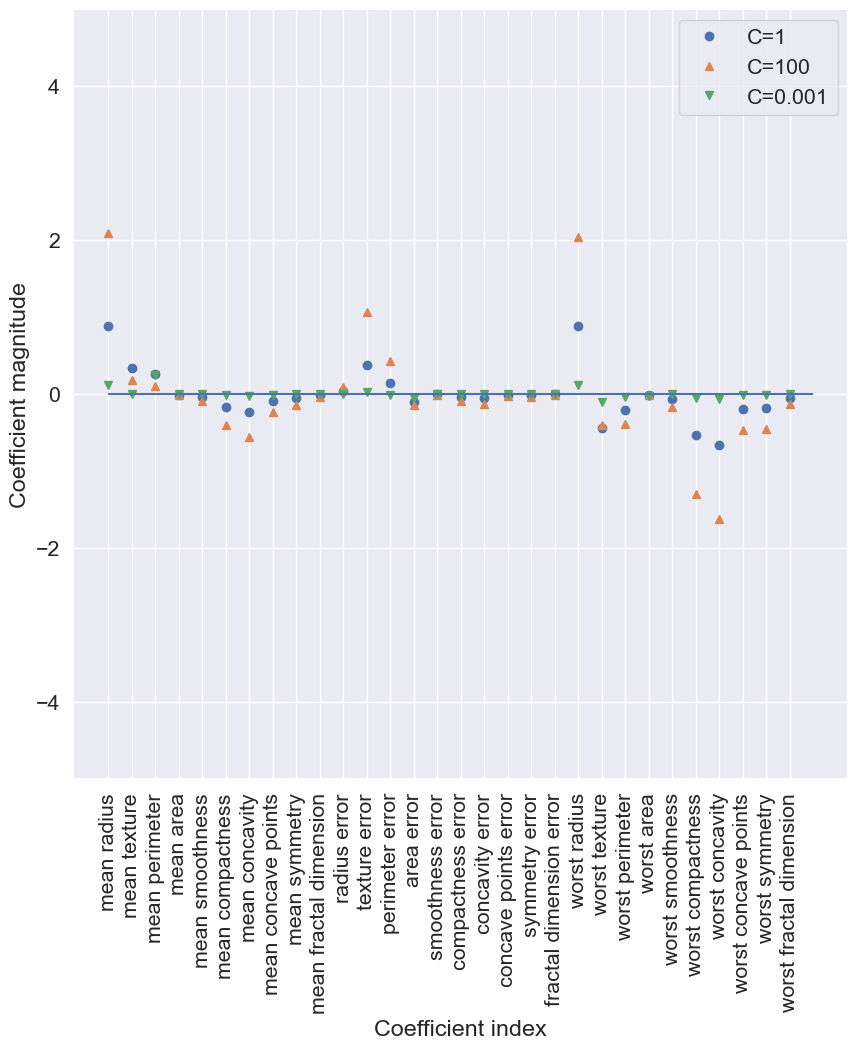

In [55]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10, 10))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend();

- `Si deseamos un modelo más interpretable, el uso de la regularización` $L^{1}$ `podría ayudar, ya que limita el modelo a utilizar sólo unas pocas características`. El siguiente es el gráfico de coeficientes y las precisiones de clasificación para la regularización $L^{1}$

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


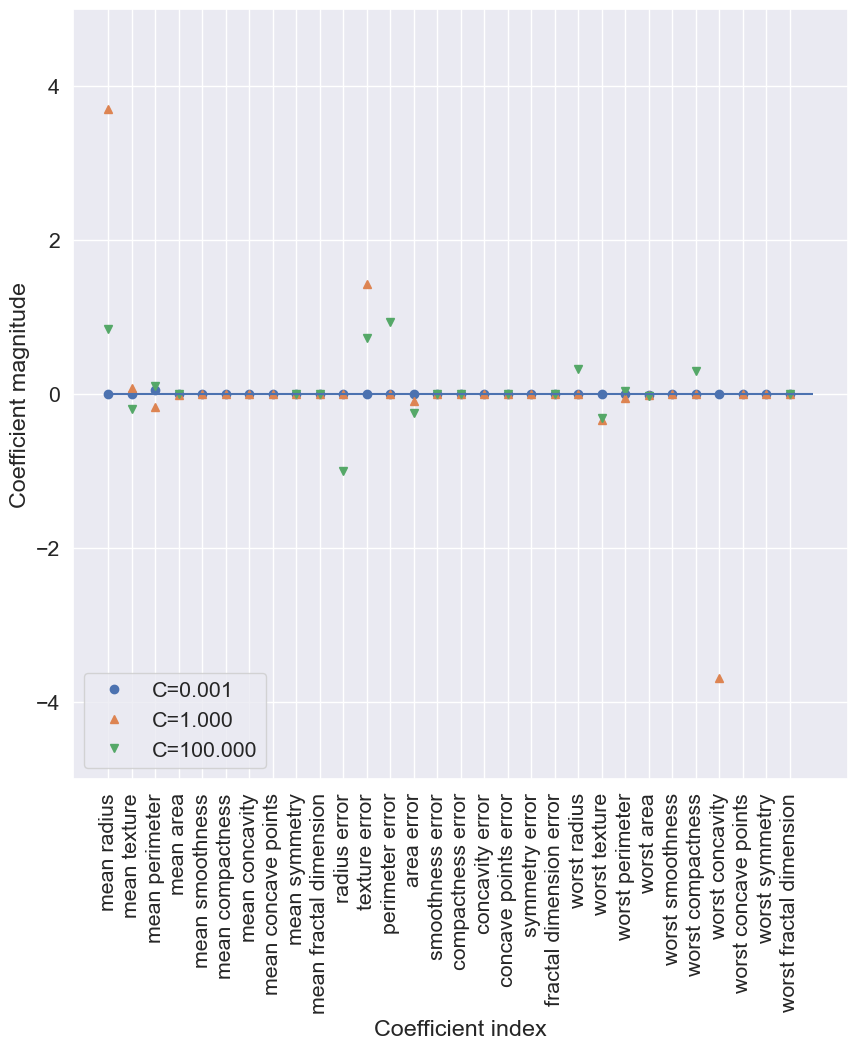

In [56]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10, 10))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, 
                               penalty="l1", 
                               solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3);

- Como puede ver, `hay mucha similitud entre los modelos lineales de clasificación binaria y los modelos lineales de regresión`. Como en la regresión, la principal diferencia entre los modelos es el parámetro de penalización, que influye en la regularización, `en si el modelo utilizará todas las características disponibles o seleccionará sólo un subconjunto.`

## Modelos lineales para la clasificación multiclase

- Muchos modelos de clasificación lineal sólo sirven para la clasificación binaria y no se extienden de forma natural al caso multiclase (con la excepción de la `regresión logística`). Una técnica común para extender un algoritmo de clasificación binaria a un `algoritmo de clasificación multiclase` es el enfoque `one-vs.-rest`. En el enfoque `one-vs.-rest`, `se aprende un modelo binario para cada clase fija, el cual intenta separar esa clase de todas las demás, lo cual da lugar a tantos modelos binarios como clases exista`. Para hacer una predicción, se ejecutan todos los clasificadores binarios en un punto de prueba. `El clasificador que tenga la mayor puntuación en su clase "gana", y esta etiqueta de clase se devuelve como predicción`. Al tener un clasificador binario por clase, se tiene un vector de coeficientes $\boldsymbol{\beta}$ para cada clase. La clase para la que el resultado de la fórmula de confianza de clasificación dada aquí, es la más alta, es la etiqueta de clase asignada:

$$
\beta_{0}+\beta_{1}\cdot x_{1}+\beta_{2}\cdot x_{2}+\cdots+\beta_{p}\cdot x_{p}
$$

- Las matemáticas que subyacen a la `regresión logística multiclase` difieren en cierta medida del enfoque de una sola clase, pero también dan como resultado un `vector de coeficientes y un intercepto por clase, y se aplica el mismo método para hacer una predicción`. Apliquemos el método de `one-vs.-rest` a un conjunto de datos de clasificación de tres clases. Utilizamos un `conjunto de datos bidimensional, en el que cada clase viene dada por datos muestreados de una distribución gaussiana.`

In [57]:
from sklearn.datasets import make_blobs

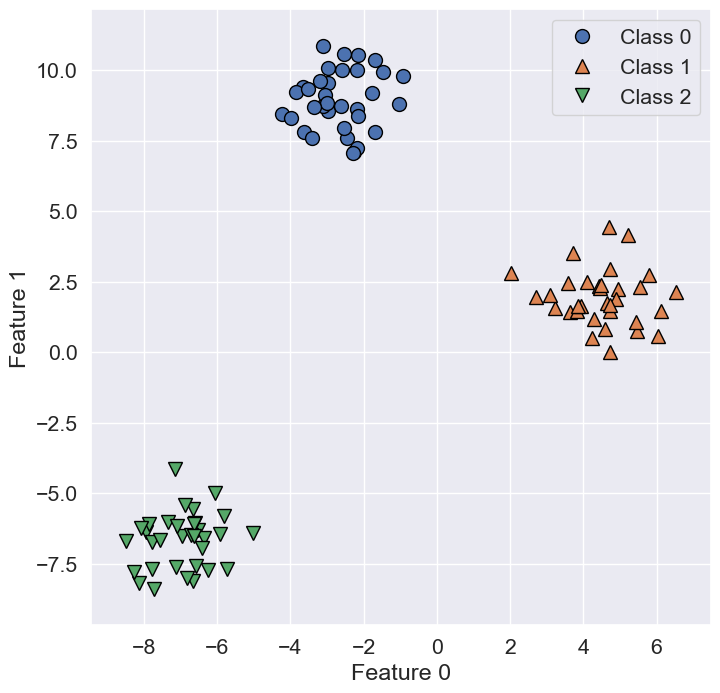

In [58]:
X, y = make_blobs(random_state=42)
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

- Ahora, entrenamos un clasificador `LinearSVC` en el conjunto de datos

In [59]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


- Vemos que la dimensión (`shape`) de `coef_` es `(3, 2)`, lo que significa que `cada fila de coef_ contiene el vector de coeficientes para cada una de las tres clases` y `cada columna contiene el valor del coeficiente para cada característica específica` (hay dos en este conjunto de datos). La matriz `intercept_ es ahora una matriz unidimensional que almacena los interceptos de cada clase`. Visualicemos las líneas dadas por los tres clasificadores binarios. En este caso `line=x`, para el clasificador separador `ax+by+c=0`.

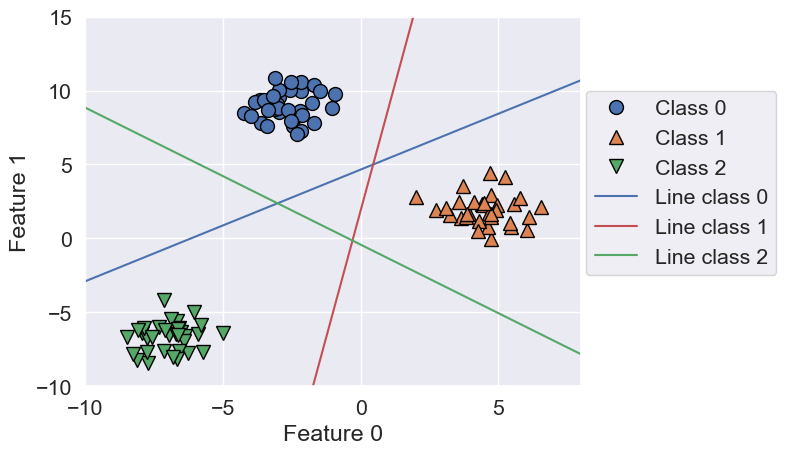

In [60]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 
                'Line class 2'], loc=(1.01, 0.3))

- Se puede ver que `todos los puntos que pertenecen a la clase 0 en los datos de entrenamiento están por encima de la línea correspondiente a la clase 0`, lo que significa que están en el lado de la "clase 0" de este clasificador binario. Además, `los puntos de la clase 0 están por encima de la línea correspondiente a la clase 2, lo que significa que son clasificados como "resto" por el clasificador binario de la clase 2`. `Los puntos que pertenecen a la clase 0 están a la izquierda de la línea correspondiente a la clase 1, lo que significa que el clasificador binario para la clase 1 también los clasifica como "resto"`. Por tanto, cualquier punto de esta zona será clasificado como clase 0 por el clasificador final (`el resultado de la fórmula de confianza de la clasificación para el clasificador 0 es mayor que cero, mientras que es menor que cero para las otras dos clases`). 

- Pero, `¿qué ocurre con el triángulo del centro del gráfico? Los tres clasificadores binarios clasifican los puntos allí como "resto"`. `¿A qué clase se asignaría un punto allí?` La respuesta es, la que tiene el valor más alto de la fórmula de clasificación: `la clase de la línea más cercana`.

- El siguiente ejemplo muestra las `predicciones para todas las regiones del espacio 2D de la zona`

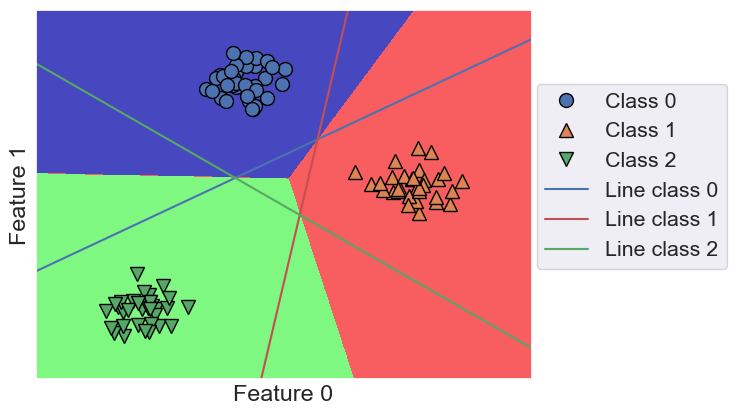

In [61]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

```{admonition} Puntos fuertes, puntos débiles y parámetros
:class: tip

- El parámetro principal de los modelos lineales es el parámetro de regularización, llamado `alpha` en los modelos de regresión y `C` en `LinearSVC` y `LogisticRegression`. Los `valores grandes de alpha o valores pequeños de C están asociados con modelos simples`. En particular, para los modelos de regresión, el ajuste de estos parámetros es bastante importante. Normalmente, `C` y `alpha` se buscan en una escala logarítmica. 

- La otra decisión que hay que tomar es si se quiere utilizar la regularización $L^1$ o la regularización $L^2$. `Si se supone que sólo unas pocas características son realmente importantes, se debería utilizar la regularización` $L^1$, `de lo contrario, debería utilizar` $L^2$ `por defecto`. $L^1$ `también puede ser útil si la interpretabilidad del modelo es importante`. Como $L^1$ utilizará sólo unas pocas características, es más fácil explicar qué características son importantes para el modelo, y cuáles son los efectos de esas características.

- Los `modelos lineales son muy rápidos de entrenar y de predecir`. Se adaptan a conjuntos de datos muy grandes y funcionan bien con datos dispersos. Si sus datos constan de cientos de miles o millones de muestras, es posible que desee investigar el uso de la opción `solver='sag'` en `LogisticRegression` y `Ridge`, que puede ser más rápida que la predeterminada en grandes conjuntos de datos. Otras opciones son la clase `SGDClassifier y la clase SGDRegressor que implementan versiones aún más escalables de los modelos lineales descritos aquí`.

- Otro punto fuerte de los modelos lineales es que `permiten entender con relativa facilidad cómo se realiza una predicción, utilizando las fórmulas que vimos antes para la regresión y la clasificación`. Por desgracia, a menudo, no está del todo claro por qué los coeficientes son como son. Esto es particularmente cierto si su conjunto de datos tiene características altamente correlacionadas; en estos casos, los coeficientes pueden ser difíciles de interpretar.

- `Los modelos lineales suelen funcionar bien cuando el número de características es grande en comparación con el número de muestras`. También se utilizan a menudo en conjuntos de datos muy grandes, simplemente porque no es factible entrenar otros modelos. Sin embargo, `en espacios de menor dimensión otros modelos pueden ofrecer un mejor rendimiento de generalización`. Veremos algunos ejemplos en los que los modelos lineales fallan cuando abordemos **`máquinas de vectores de soporte kernelizadas`**
```